# Data Mining Lab 1
In this lab session we will focus on the use of scientific computing libraries to efficiently process, transform, and manage data. We will also provide best practices and introduce visualization tools for effectively conducting big data analysis. Furthermore, we will show you how to implement basic classification techniques.

---

## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Atrribute Transformation / Aggregation
 - 5.5 Dimensionality Reduction
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Data Classification
8. Conclusion
9. References

---

## Introduction
In this notebook I will explore a text-based, document-based [dataset](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) using scientific computing tools such as Pandas and Numpy. In addition, several fundamental Data Mining concepts will be explored and explained in details, ranging from calculating distance measures to computing term frequency vectors. Coding examples, visualizations and demonstrations will be provided where necessary. Furthermore, additional exercises are provided after special topics. These exercises are geared towards testing the proficiency of students and motivate students to explore beyond the techniques covered in the notebook. 

---

### Requirements
Here are the computing and software requirements

#### Computing Resources
- Operating system: Preferably Linux or MacOS
- RAM: 8 GB
- Disk space: Mininium 8 GB

#### Software Requirements
Here is a list of the required programs and libraries necessary for this lab session:

##### Language:
- [Python 3+](https://www.python.org/download/releases/3.0/) (Note: coding will be done strictly on Python 3)
    - We are using Python 3.9.6.
    - You can use newer version, but use at your own risk.
    
##### Environment:
Using an environment is to avoid some library conflict problems. You can refer this [Setup Instructions](http://cs231n.github.io/setup-instructions/) to install and setup.

- [Anaconda](https://www.anaconda.com/download/) (recommended but not required)
    - Install anaconda environment
    
- [Python virtualenv](https://virtualenv.pypa.io/en/stable/userguide/) (recommended to Linux/MacOS user)
    - Install virtual environment

- [Kaggle Kernel](https://www.kaggle.com/kernels/)
    - Run on the cloud  (with some limitations)
    - Reference: [Kaggle Kernels Instructions](https://github.com/omarsar/data_mining_lab/blob/master/kagglekernel.md)
    
##### Necessary Libraries:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install `jupyter` and Use `$jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install `sklearn` latest python library
- [Pandas](http://pandas.pydata.org/)
    - Install `pandas` python library
- [Numpy](http://www.numpy.org/)
    - Install `numpy` python library
- [Matplotlib](https://matplotlib.org/)
    - Install `maplotlib` for python (version 3.7.3 recommended, pip install matplotlib==3.7.3)
- [Plotly](https://plot.ly/)
    - Install and signup for `plotly`
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install `nltk` library
- [PAMI](https://github.com/UdayLab/PAMI?tab=readme-ov-file)
    - Install `PAMI` library
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install `UMAP` library

---

In [2]:
# # TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2 

## 1. The Data
In this notebook we will explore the popular 20 newsgroup dataset, originally provided [here](http://qwone.com/~jason/20Newsgroups/). The dataset is called "Twenty Newsgroups", which means there are 20 categories of news articles available in the entire dataset. A short description of the dataset, provided by the authors, is provided below:

- *The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. To the best of our knowledge, it was originally collected by Ken Lang, probably for his paper “Newsweeder: Learning to filter netnews,” though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.*

If you need more information about the dataset please refer to the reference provided above. Below is a snapshot of the dataset already converted into a table. Keep in mind that the original dataset is not in this nice pretty format. That work is left to us. That is one of the tasks that will be covered in this notebook: how to convert raw data into convenient tabular formats using Pandas. 


在本筆記本中，我們將探索 20 個流行的新聞群組資料集，最初在[此處](http://qwone.com/~jason/20Newsgroups/) 提供。該資料集被稱為“二十新聞群組”，這意味著整個資料集中有 20 類新聞文章。作者提供的資料集的簡短描述如下：

- *20 Newsgroups 資料集是大約 20,000 個新聞群組文件的集合，（幾乎）均勻地分佈在 20 個不同的新聞群組中。據我們所知，它最初是由 Ken Lang 收集的，可能是為了他的論文“Newsweeder：學習過濾網路新聞”，儘管他沒有明確提及這個集合。 20 個新聞組集合已成為機器學習技術文本應用實驗的熱門資料集，例如文字分類和文字聚類。*

如果您需要有關數據集的更多信息，請參閱上面提供的參考資料。下面是已轉換為表格的資料集的快照。請記住，原始資料集並不是這種漂亮的格式。這項工作就留給我們了。這是本筆記本將涵蓋的任務之一：如何使用 Pandas 將原始資料轉換為方便的表格格式。

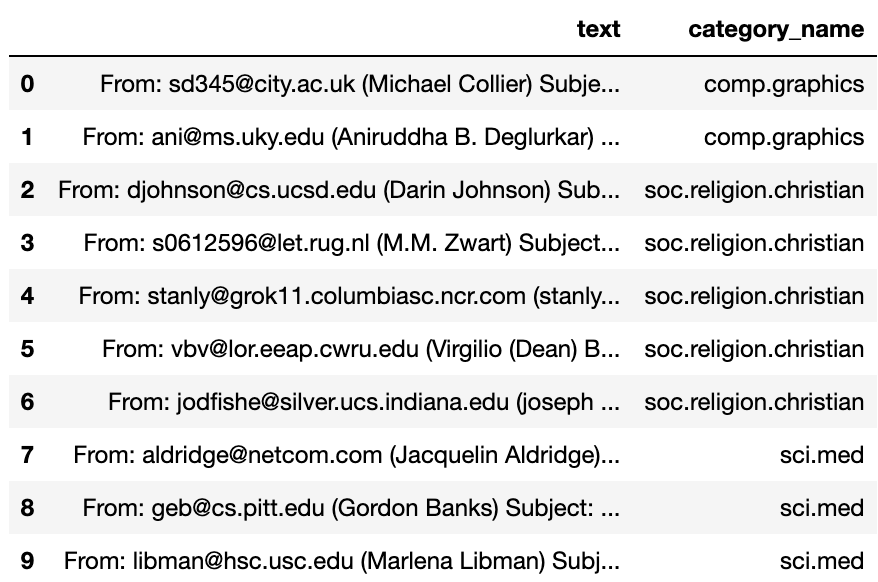

---

## 2. Data Preparation
In the following we will use the built-in dataset loader for 20 newsgroups from scikit-learn. Alternatively, it is possible to download the dataset manually from the website and use the sklearn.datasets.load_files function by pointing it to the 20news-bydate-train sub-folder of the uncompressed archive folder.

In order to get faster execution times for this first example we will work on a partial dataset with only 4 categories out of the 20 available in the dataset:

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime 
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

Let's take a look at some of the records that are contained in our subset of the data

In [5]:
twenty_train.data[0:2]

# 此資料集為文本資料集，每一筆資料為一篇文章，包含標題、作者、內文、日期、文章編號、文章類別、文章編碼、文章內容、文章檔名、路徑、新聞組、新聞組編碼等資訊

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

**Note** the `twenty_train` is just a bunch of objects that can be accessed as python dictionaries; so, you can do the following operations on `twenty_train`

**Note** `twenty_train` 只是一堆可以作為 python 字典存取的物件；因此，您可以對“twenty_train”執行以下操作

In [6]:
# 文章類別

twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [7]:
# 文章數量

len(twenty_train.data)

2257

In [8]:
len(twenty_train.filenames)

2257

#### We can also print an example from the subset

#### 我們也可以從子集中列印一個範例

In [9]:
# An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

# 0 這裡的數字代表第幾個 document

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



... and determine the label of the example via `target_names` key value

...並透過 `target_names` 鍵值確定範例的標籤

In [10]:
# 0 這裡的數字代表第幾個 document
 
print(twenty_train.target_names[twenty_train.target[0]]) 

comp.graphics


In [11]:
# 取得文章的類別

twenty_train.target[0]  # 0 這裡的數字代表第幾個 document

np.int64(1)

... we can also get the category of 10 documents via `target` key value 

……我們也可以透過 `target` 鍵值來取得10個文檔的類別

In [12]:
# category of first 10 documents.
twenty_train.target[0:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

**Note:** As you can observe, both approaches above provide two different ways of obtaining the `category` value for the dataset. Ideally, we want to have access to both types -- numerical and nominal -- in the event some particular library favors a particular type. 

**Note：** 正如您所觀察到的，上述兩種方法都提供了兩種不同的方式來獲取資料集的 `類別` 值。理想情況下，我們希望能夠存取這兩種類型（數值型和名目型），以防某些特定庫支援特定類型。

As you may have already noticed as well, there is no **tabular format** for the current version of the data. As data miners, we are interested in having our dataset in the most convenient format as possible; something we can manipulate easily and is compatible with our algorithms, and so forth.

您可能也已經注意到，目前版本的資料沒有**表格格式**。身為資料探勘者，我們希望資料集盡可能採用最方便的格式；我們可以輕鬆操縱並且與我們的演算法相容的東西，等等。

Here is one way to get access to the *text* version of the label of a subset of our training data:

這是存取訓練資料子集標籤的*文字*版本的一種方法：

In [13]:
# 取得前 10 筆文章的類別
# t 為文章的類別
# 透過類別編碼，取得類別名稱

for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


---

### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

在本練習中，請列印資料集中前三個樣本的*文字*資料。 （請參閱上面的程式碼以取得協助）

In [14]:
# Answer here

for text in twenty_train.data[:3]:
    # print 出第幾篇文章
    print("Article: ", twenty_train.data.index(text)+1)
    print(text)

Article:  1
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

Article:  2
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a re

---

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

因此，我們希望更好地探索和理解我們的數據。在此之前，我們肯定需要應用一些轉換，以便我們的資料集採用良好的格式，以便能夠自由且更有效率地探索它。對我們來說幸運的是，有強大的科學工具可以將我們的資料轉換為我們熟悉的表格格式。這就是我們在下一節中要做的事——將資料轉換為漂亮的表格格式。

---

### 3.1 Converting Dictionary into Pandas Dataframe

### 3.1 將字典轉換為 Pandas Dataframe

Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

在這裡，我們將向您展示如何將字典物件轉換為 pandas 資料框。順便說一句，pandas 資料框只不過是一個為了高效資訊檢索而神奇儲存的表。

In [15]:
import pandas as pd

# my functions   # 自己寫的函數
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
# 透過 list 建立 dataframe
# 設定欄位名稱為 text
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])


In [16]:
X

,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4,From: stanly@grok11.columbiasc.ncr.com (stanly...
...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...


In [17]:
len(X)

2257

In [18]:
X[0:2]

,text
0,From: sd345@city.ac.uk (Michael Collier) Subje...
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...


In [19]:
# 印出前 2 篇文章的內容

for t in X["text"][:2]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

### Adding Columns

### 新增行

One of the great advantages of a pandas dataframe is its flexibility. We can add columns to the current dataset programmatically with very little effort.

pandas 資料框的一大優點是它的靈活性。我們可以透過程式設計方式輕鬆地將行新增到當前資料集。

In [20]:
# add category to the dataframe
# 新增 `category` 欄位到 dataframe，內容為文章的類別編碼 (target: 0, 1, 2, 3)
X['category'] = twenty_train.target

In [21]:
X[:2]

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1


In [22]:
# add category label also
# 新增 `category_name` 欄位到 dataframe，內容為文章的類別名稱
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [23]:
X[345:347]

,text,category,category_name
345,From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...,0,alt.atheism
346,From: darice@yoyo.cc.monash.edu.au (Fred Rice)...,0,alt.atheism


Now we can print and see what our table looks like. 

現在我們可以列印並查看表格的樣子。

In [24]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


Nice! Isn't it? With this format we can conduct many operations easily and efficiently since Pandas dataframes provide us with a wide range of built-in features/functionalities. These features are operations which can directly and quickly be applied to the dataset. These operations may include standard operations like **removing records with missing values** and **aggregating new fields** to the current table (hereinafter referred to as a dataframe), which is desirable in almost every data mining project. Go Pandas!

好的！不是嗎？透過這種格式，我們可以輕鬆有效地進行許多操作，因為 Pandas 資料框為我們提供了廣泛的內建特性/功能。這些特徵是可以直接快速應用於資料集的操作。這些操作可能包括標準操作，例如**刪除具有缺失值的記錄**和**將新欄位聚合到當前表**（下文中稱為資料幀），這在幾乎每個資料探勘項目中都是可取的。去 Pandas 吧！

---

### 3.2 Familiarizing yourself with the Data

### 3.2 熟悉數據

To begin to show you the awesomeness of Pandas dataframes, let us look at how to run a simple query on our dataset. We want to query for the first 10 rows (documents), and we only want to keep the `text` and `category_name` attributes or fields.

為了開始向您展示 Pandas 資料框的強大之處，讓我們看看如何對我們的資料集執行簡單的查詢。我們想要查詢前 10 行（文件），並且只想保留 `text` 和 `category_name` 屬性或欄位。

In [25]:
# a simple query
# 只想看文章內容 (text) 和類別名稱 (category_name)
X[:10][["text","category_name"]]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,sci.med


Let us look at a few more interesting queries to familiarize ourselves with the efficiency and conveniency of Pandas dataframes.

讓我們來看看一些更有趣的查詢，以熟悉 Pandas dataframe 的效率和便利性。

#### Let's query the last 10 records

#### 我們來查詢最後10筆記錄

In [26]:
X[-10:]
# X.tail(10)

,text,category,category_name
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2249,From: shellgate!llo@uu4.psi.com (Larry L. Over...,3,soc.religion.christian
2250,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism
2251,From: Mark-Tarbell@suite.com Subject: Amniocen...,2,sci.med
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


<font color = yellow> **重要** </font>

Ready for some sourcery? Brace yourselves! Let us see if we can query the first 10th record in our dataframe. For this we will use the build-in function called `loc`. This allows us to explicity define the columns you want to query.

準備好一些資源了嗎？振作起來！讓我們看看是否可以查詢資料框中的前 10 筆記錄。為此，我們將使用名為 `loc` 的內建函數。這使我們能夠明確定義要查詢的列。

In [27]:
# using loc (by label)
# 查詢出前 10 筆資料的 text 欄位 (藉由 label)
X.loc[:9, 'text']

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

<font color = yellow> **重要** </font>

You can also use the `iloc` function to query a selection of our dataset by position. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

您也可以使用“iloc”函數按位置查詢我們的資料集選擇。看看這個 [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) 關於` iloc` 和 `loc` 函數。

In [28]:
# using iloc (by position)
# 查詢出前 10 筆資料的 text 欄位 (藉由位置)
X.iloc[:10, 0]

# 適合不知道 label 是什麼的時候

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

### **>>> Exercise 2 (take home):** 

Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

使用 pandas dataframes 嘗試其他查詢技術。有關更多信息，請參閱他們的 [文檔](https://pandas.pydata.org/pandas-docs/stable/indexing.html)。

In [29]:
# Answer here

---

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

嘗試取得屬於 ```sci.med``` 類別的記錄，並每 10 筆記錄進行查詢。只顯示前 5 筆記錄。

In [30]:
X[X['category_name'] == 'sci.med'].iloc[::10][:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


---

## 4. Data Mining using Pandas

Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can convince ourselves of the true power of Pandas dataframes. 

### 4.1 Missing Values

First, let us consider that our dataset has some *missing values* and we want to remove those values. In its current state our dataset has no missing values, but for practice sake we will add some records with missing values and then write some code to deal with these objects that contain missing values. You will see for yourself how easy it is to deal with missing values once you have your data transformed into a Pandas dataframe.

Before we jump into coding, let us do a quick review of what we have learned in the Data Mining course. Specifically, let's review the methods used to deal with missing values.

The most common reasons for having missing values in datasets has to do with how the data was initially collected. A good example of this is when a patient comes into the ER room, the data is collected as quickly as possible and depending on the conditions of the patients, the personal data being collected is either incomplete or partially complete. In the former and latter cases, we are presented with a case of "missing values". Knowing that patients data is particularly critical and can be used by the health authorities to conduct some interesting analysis, we as the data miners are left with the tough task of deciding what to do with these missing and incomplete records. We need to deal with these records because they are definitely going to affect our analysis or learning algorithms. So what do we do? There are several ways to handle missing values, and some of the more effective ways are presented below (Note: You can reference the slides - Session 1 Handout for the additional information).

- **Eliminate Data Objects** - Here we completely discard records once they contain some missing values. This is the easiest approach and the one we will be using in this notebook. The immediate drawback of going with this approach is that you lose some information, and in some cases too much of it. Now imagine that half of the records have at least one or more missing values. Here you are presented with the tough decision of quantity vs quality. In any event, this decision must be made carefully, hence the reason for emphasizing it here in this notebook. 

- **Estimate Missing Values** - Here we try to estimate the missing values based on some criteria. Although this approach may be proven to be effective, it is not always the case, especially when we are dealing with sensitive data, like **Gender** or **Names**. For fields like **Address**, there could be ways to obtain these missing addresses using some data aggregation technique or obtain the information directly from other databases or public data sources.

- **Ignore the missing value during analysis** - Here we basically ignore the missing values and proceed with our analysis. Although this is the most naive way to handle missing values it may proof effective, especially when the missing values includes information that is not important to the analysis being conducted. But think about it for a while. Would you ignore missing values, especially when in this day and age it is difficult to obtain high quality datasets? Again, there are some tradeoffs, which we will talk about later in the notebook.

- **Replace with all possible values** - As an efficient and responsible data miner, we sometimes just need to put in the hard hours of work and find ways to makes up for these missing values. This last option is a very wise option for cases where data is scarce (which is almost always) or when dealing with sensitive data. Imagine that our dataset has an **Age** field, which contains many missing values. Since **Age** is a continuous variable, it means that we can build a separate model for calculating the age for the incomplete records based on some rule-based approach or probabilistic approach.  

As mentioned earlier, we are going to go with the first option but you may be asked to compute missing values, using a different approach, as an exercise. Let's get to it!

First we want to add the dummy records with missing values since the dataset we have is perfectly composed and cleaned that it contains no missing values. First let us check for ourselves that indeed the dataset doesn't contain any missing values. We can do that easily by using the following built-in function provided by Pandas.  

In [31]:
# check missing values
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2252,False,False,False
2253,False,False,False
2254,False,False,False
2255,False,False,False


The `isnull` function looks through the entire dataset for null values and returns `True` wherever it finds any missing field or record. As you will see above, and as we anticipated, our dataset looks clean and all values are present, since `isnull` returns **False** for all fields and records. But let us start to get our hands dirty and build a nice little function to check each of the records, column by column, and return a nice little message telling us the amount of missing records found. This excerice will also encourage us to explore other capabilities of pandas dataframes. In most cases, the build-in functions are good enough, but as you saw above when the entire table was printed, it is impossible to tell if there are missing records just by looking at preview of records manually, especially in cases where the dataset is huge. We want a more reliable way to achieve this. Let's get to it!

In [32]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))
# X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 0)

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


Okay, a lot happened there in that one line of code, so let's break it down. First, with the `isnull` we tranformed our table into the **True/False** table you see above, where **True** in this case means that the data is missing and **False** means that the data is present. We then take the transformed table and apply a function to each row that essentially counts to see if there are missing values in each record and print out how much missing values we found. In other words the `check_missing_values` function looks through each field (attribute or column) in the dataset and counts how many missing values were found. 

There are many other clever ways to check for missing data, and that is what makes Pandas so beautiful to work with. You get the control you need as a data scientist or just a person working in data mining projects. Indeed, Pandas makes your life easy!

---

### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

讓我們嘗試一些不同的東西。我們不按列計算缺失值，而是嘗試計算每筆記錄而不是每列中的缺失值。
$Hint$ : `axis` 參數。查看文件以取得更多資訊。

In [33]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

---

We have our function to check for missing records, now let us do something mischievous and insert some dummy data into the dataframe and test the reliability of our function. This dummy data is intended to corrupt the dataset. I mean this happens a lot today, especially when hackers want to hijack or corrupt a database.

我們有檢查遺失記錄的函數，現在讓我們做一些惡作劇，將一些虛擬資料插入資料框並測試函數的可靠性。此虛擬資料旨在破壞資料集。我的意思是這種情況現在經常發生，特別是當駭客想要劫持或損壞資料庫時。

We will insert a `Series`, which is basically a "one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.", into our current dataframe.

我們將插入一個 `Series`，它基本上是一個“能夠保存任何類型（整數、字串、浮點、Python 物件等）資料的一維標記數組。軸標籤統稱為索引。”我們目前的資料框。

用 series 把 data 加進去

In [34]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [35]:
dummy_series

text        dummy_record
category               1
dtype: object

In [36]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,text,category
0,dummy_record,1


In [37]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
result_with_series

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


In [38]:
# check if the records was commited into result
len(result_with_series)

2258

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [39]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the `category_name` attribute. As I mentioned before, there are many ways to conduct specific operations on the dataframes. In this case let us use a simple dictionary and try to insert it into our original dataframe `X`. Notice that above we are not changing the `X` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `X` and assign it to itself as we will do below. This modification will create a need to remove this dummy record later on, which means that we need to learn more about Pandas dataframes. This is getting intense! But just relax, everything will be fine!

用 directionary 把 data 加進去

In [40]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [41]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


In [42]:
len(X)

2258

In [43]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

移除 missing value

In [44]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [45]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [46]:
len(X)

2257

And we are back with our original dataset, clean and tidy as we want it. That's enough on how to deal with missing values, let us now move unto something more fun. 

But just in case you want to learn more about how to deal with missing data, refer to the official [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?


有句老話說：「細節決定成敗」。當我們處理非常大的數據時，很難一一檢查記錄（正如我們到目前為止所做的那樣）。而且，我們甚至不知道我們面臨著什麼樣的缺失值。因此，當我們花更多的時間解決錯誤時，「debugging」技能就會變得更加敏銳。讓我們重點關注檢查缺失值的不同方法以及您可能遇到的缺失值的類型。檢查缺失值並不容易，您很快就會發現。

請檢查下面的數據和過程，描述您觀察到的情況以及發生的原因。
$Hint$ ：為什麼 `.isnull()` 不起作用？

In [47]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                            },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [48]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [49]:
# Answer here


---

### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `X` dataframe.


處理重複資料與處理遺失資料一樣痛苦。最糟的情況是您有包含缺失值的重複資料。但我們不要得意忘形。讓我們堅持基礎知識。正如我們在資料探勘課程中所了解的那樣，由於多種原因可能會出現重複資料。大多數時候，這與我們如何儲存資料或如何收集和合併資料有關。例如，我們可能收集並儲存了一條推文，並將該推文的轉發作為兩條不同的記錄；這會導致數據重複的情況；唯一的區別是，一個是原始推文，另一個是轉發的推文。在這裡，您將了解處理重複資料並不像處理缺失值那麼具有挑戰性。但這也完全取決於您認為重複資料的內容，即，這一切都取決於您認為重複記錄的標準以及您正在處理的資料類型。對於文字資料來說，它可能不像對於數值或圖像那麼微不足道。不管怎樣，讓我們來看看一些關於如何處理「X」資料框中重複記錄的程式碼。

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

首先，讓我們檢查當前資料集中有多少重複項。這是檢查重複項的程式碼行；它與我們用來檢查缺失值的 ```isnull``` 函數非常相似。

In [50]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [51]:
sum(X.duplicated())

0

Based on that output, you may be asking why did the `duplicated` operation only returned one single column that indicates whether there is a duplicate record or not. So yes, all the `duplicated()` operation does is to check per records instead of per column. That is why the operation only returns one value instead of three values for each column. It appears that we don't have any duplicates since none of our records resulted in `True`. If we want to check for duplicates as we did above for some particular column, instead of all columns, we do something as shown below. As you may have noticed, in the case where we select some columns instead of checking by all columns, we are kind of lowering the criteria of what is considered as a duplicate record. So let us only check for duplicates by only checking the `text` attribute. 

根據該輸出，您可能會問為什麼 `duplicated` 操作只會傳回一列來指示是否存在重複記錄。所以是的，所有 `duplicated()` 操作所做的就是檢查每筆記錄而不是每列。這就是為什麼該操作只為每一列傳回一個值而不是三個值。看來我們沒有任何重複項，因為我們的記錄都沒有得出 `True`。如果我們想要像上面對某些特定行而不是所有行所做的那樣檢查重複項，我們會執行如下所示的操作。您可能已經注意到，在我們選擇某些行而不是檢查所有行的情況下，我們有點降低了被視為重複記錄的標準。因此，讓我們僅透過檢查 `text` 屬性來檢查重複項。

In [52]:
sum(X.duplicated('text'))

0

Now let us create some duplicated dummy records and append it to the main dataframe `X`. Subsequenlty, let us try to get rid of the duplicates.

現在讓我們建立一些重複的虛擬記錄並將其附加到主資料框 `X`。接下來，讓我們嘗試刪除重複項。

In [53]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [54]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med
2257,dummy record,1,dummy category


In [55]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2254    False
2255    False
2256    False
2257    False
2258     True
Length: 2259, dtype: bool

In [56]:
len(X)

2259

In [57]:
sum(X.duplicated())

1

We have added the dummy duplicates to `X`. Now we are faced with the decision as to what to do with the duplicated records after we have found it. In our case, we want to get rid of all the duplicated records without preserving a copy. We can simply do that with the following line of code:

我們已將虛擬重複項新增至 `X`。現在我們面臨著在找到重複記錄後如何處理它的決定。在我們的例子中，我們希望刪除所有重複的記錄而不保留副本。我們可以簡單地使用以下程式碼行來做到這一點：

In [58]:
# keep = False 表示 duplicate 的都刪除；inplace = True 表示 duplicate 的變更
# inplace = True 表示直接在我們的 dataframe 上應用變更；若為 False 則會回傳一個新的 dataframe

X.drop_duplicates(keep = False, inplace = True) # inplace applies changes directly on our dataframe
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [59]:
len(X)

2257

Check out the Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html?highlight=duplicate#duplicate-data) for more information on dealing with duplicate data.

---

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to perform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

In [60]:
X_sample = X.sample(n=1000) #random state

In [61]:
len(X_sample)

1000

In [62]:
X_sample[0:4]

,text,category,category_name
2221,From: mcovingt@aisun3.ai.uga.edu (Michael Covi...,3,soc.religion.christian
1190,From: JEK@cu.nih.gov Subject: about Eliz C Pro...,3,soc.religion.christian
371,From: johnsh@rpi.edu (Hugh Johnson) Subject: R...,1,comp.graphics
1770,From: med50003@nusunix1.nus.sg (WANSAICHEONG K...,2,sci.med


---

### **>>> Exercise 6 (take home):**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

注意到從 `X` 資料幀到 `X_sample` dataframe 的任何變化嗎？這些是什麼？報告與`X`之前的狀態相比您注意到的每一個變化。請隨意查詢並更仔細地查看資料框以了解這些變更。

In [63]:
# Answer here


---

Let's do something cool here while we are working with sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use `matplotlib` python library. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of `matplotlib` below.

讓我們在進行採樣時在這裡做一些很酷的事情！讓我們看看樣本和原始資料集中的類別分佈。讓我們可視化並分析兩個資料集之間的差異。為了產生一些視覺化效果，我們將使用「matplotlib」Python 函式庫。使用 `matplotlib`，速度更快且相容性更好，它可能是用於視覺化從 dataframes 中提取的內容以及使用 Jupyter 筆記本時的最佳視覺化函式庫。下面讓我們來看看 `matplotlib` 的魔力。

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

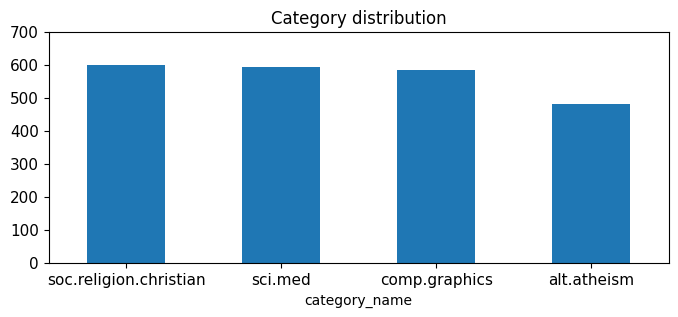

In [66]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
sci.med                   274
soc.religion.christian    262
comp.graphics             242
alt.atheism               222
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

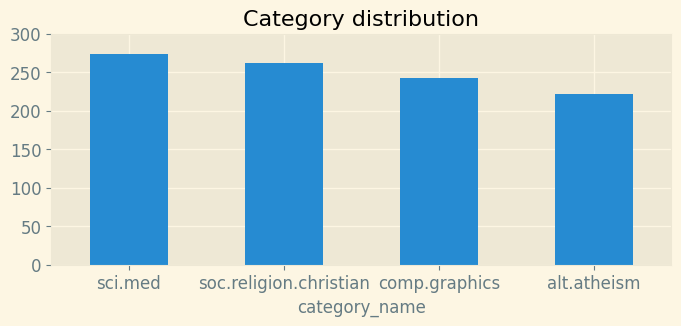

In [67]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
plt.style.use('Solarize_Light2')
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

You can use following command to see other available styles to prettify your charts.
```python
print(plt.style.available)```

---

### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

請注意，對於 `ylim` 參數，我們硬編碼了 y 的最大值。是否可以自動化而不是硬編碼？你會怎樣做呢？ （提示：查看上面的程式碼以獲取線索）

（如何讓 y 的 limit 自動調成合適的？）

category_name
sci.med                   274
soc.religion.christian    262
comp.graphics             242
alt.atheism               222
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

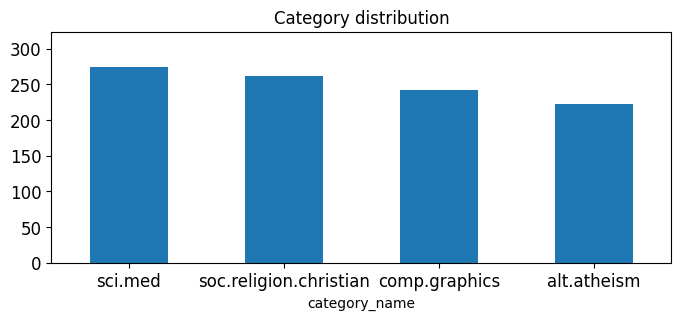

In [68]:
# Answer here

upper_bound = max(X_sample.category_name.value_counts()) + 50
print(X_sample.category_name.value_counts())
# plt.style.use('ggplot')
plt.style.use('default')
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

我們也可以對兩個資料集之間的分佈進行並排比較，但也許您可以嘗試將其作為練習。下面我們向您展示我們正在尋找的圖表類型的快照。

![alt txt](https://i.imgur.com/9eO431H.png)

In [69]:
# Answer here


One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

這兩個資料集中突出的一件事是類別的分佈保持相對相同，這對我們資料科學家來說是一個好兆頭。有很多方法可以對資料集進行採樣並仍然獲得足夠代表性的資料集。這不是本筆記本的主要焦點，但如果您想了解更多有關採樣以及 `sample` 功能如何運作的信息，只需參考 Pandas 文檔，您就會發現進行更高級採樣的有趣方法。

---

### 5.2 Feature Creation
The other operation from the list above that we are going to practise on is the so-called feature creation. As the name suggests, in feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `X` table, we would like to create some features from the `text` field, but we are still not sure what kind of features we want to create. We can think of an interesting problem we want to solve, or something we want to analyze from the data, or some questions we want to answer. This is one process to come up with features -- this process is usually called `feature engineering` in the data science community. 

上面列表中我們要練習的另一個操作是所謂的特徵創建。顧名思義，在特徵創建中，我們正在考慮從原始資料集中創建新的有趣且有用的特徵；該功能可以從我們已經訪問的原始資訊中捕獲最重要的資訊。在我們的 `X` 表中，我們想從 `text` 欄位建立一些特徵，但我們仍然不確定要建立什麼樣的特徵。我們可以想出一個我們想要解決的有趣問題，或者我們想要從數據中分析的東西，或者我們想要回答的一些問題。這是提出特徵的過程──這個過程在資料科學界通常被稱為 `特徵工程`。

We know what feature creation is so let us get real involved with our dataset and make it more interesting by adding some special features or attributes if you will. First, we are going to obtain the **unigrams** for each text. (Unigram is just a fancy word we use in Text Mining which stands for 'tokens' or 'individual words'.) Yes, we want to extract all the words found in each text and append it as a new feature to the pandas dataframe. The reason for extracting unigrams is not so clear yet, but we can start to think of obtaining some statistics about the articles we have: something like **word distribution** or **word frequency**.

我們知道什麼是特徵創建，所以讓我們真正參與我們的資料集，並透過添加一些特殊特徵或屬性使其變得更有趣（如果您願意）。首先，我們將取得每個文本的 **unigrams**。 （Unigram 只是我們在文本挖掘中使用的一個奇特單詞，代表“標記”或“單詞”。）是的，我們希望提取每個文本中找到的所有單詞並將其作為新功能附加到pandas 數據幀中。提取一元組的原因尚不清楚，但我們可以開始考慮獲取有關我們擁有的文章的一些統計數據：例如**單字分佈**或**單字頻率**。

Before going into any further coding, we will also introduce a useful text mining library called [NLTK](http://www.nltk.org/). The NLTK library is a natural language processing tool used for text mining tasks, so might as well we start to familiarize ourselves with it from now (It may come in handy for the final project!). In partcular, we are going to use the NLTK library to conduct tokenization because we are interested in splitting a sentence into its individual components, which we refer to as words, emojis, emails, etc. So let us go for it! We can call the `nltk` library as follows:

在進行任何進一步的編碼之前，我們還將介紹一個有用的文本挖掘庫，稱為 [NLTK](http://www.nltk.org/)。 NLTK庫是用於文字挖掘任務的自然語言處理工具，所以我們不妨從現在開始熟悉它（它可能會對最終專案派上用場！）。特別是，我們將使用 NLTK 庫來標記化，因為我們有興趣將句子拆分為其各個組成部分，我們將其稱為單字、表情符號、電子郵件等。我們可以如下呼叫`nltk`庫：

```python
import nltk
```

In [70]:
import nltk

nltk.data.path = []
nltk.download('punkt', download_dir='C:/Users/USER/Desktop/作業和報告/研究所/資料探勘與應用/DM2024-Lab1-Master/nltk_data')
nltk.download('punkt_tab', download_dir='C:/Users/USER/Desktop/作業和報告/研究所/資料探勘與應用/DM2024-Lab1-Master/nltk_data')
# nltk.download('stopwords', download_dir='C:/Users/USER/Desktop/作業和報告/研究所/資料探勘與應用/DM2024-Lab1-Master/nltk_data')  # 如果需要停用詞
# nltk.download('averaged_perceptron_tagger', download_dir='C:/Users/USER/Desktop/作業和報告/研究所/資料探勘與應用/DM2024-Lab1-Master/nltk_data')  # 如果需要詞性標註
nltk.data.path.append('C:/Users/USER/Desktop/作業和報告/研究所/資料探勘與應用/DM2024-Lab1-Master/nltk_data')

[nltk_data] Downloading package punkt to C:/Users/USER/Desktop/作業和報告/研
[nltk_data]     究所/資料探勘與應用/DM2024-Lab1-Master/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:/Users/USER/Desktop/作業和
[nltk_data]     報告/研究所/資料探勘與應用/DM2024-Lab1-Master/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [71]:
print(nltk.__version__)
print(nltk.data.path)

3.9.1
['C:/Users/USER/Desktop/作業和報告/研究所/資料探勘與應用/DM2024-Lab1-Master/nltk_data']


In [72]:
# takes a like a minute or two to process

# nltk.data.path.append('C:/Users/USER/Desktop/作業和報告/研究所/資料探勘與應用/DM2024-Lab1-Homework/nltk_data')

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


In [73]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

If you take a closer look at the `X` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

如果您現在仔細查看 `X` 表，您將看到我們新增的新列 `unigrams` 。您會注意到它包含一個標記數組，這些標記是從原始 `text` 欄位中提取的。乍一看，您會注意到分詞器的表現不佳，讓我們仔細觀察單一記錄，看看使用 `nltk` 庫進行分詞的確切結果是什麼。

In [74]:
X[0:4]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."


In [75]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

The `nltk` library does a pretty decent job of tokenizing our text. There are many other tokenizers online, such as [spaCy](https://spacy.io/), and the built in libraries provided by [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). We are making use of the NLTK library because it is open source and because it does a good job of segmentating text-based data. 

`nltk` 庫在標記我們的文字方面做得相當不錯。網路上還有許多其他分詞器，例如 [spaCy](https://spacy.io/)，以及 [scikit-learn](http://scikit-learn.org/stable/modules/ 提供的內建函式庫)生成/sklearn.feature_extraction.text.CountVectorizer.html）。我們正在使用 NLTK 庫，因為它是開源的，而且它在分割基於文字的資料方面做得很好。

---

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

好的，我們在這裡取得了一些進展。現在讓我們讓事情變得更有趣一些。我們將做一些與迄今為止所做的不同的事情。我們將使用到目前為止所學到的一切。簡而言之，我們將放棄主資料集（特徵子集選擇的一種形式），並且我們將從原始資料集生成文檔術語矩陣。換句話說，我們將創建類似的東西。

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Initially, it won't have the same shape as the table above, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

最初，它的形狀不會與上表相同，但我們稍後會討論。現在，讓我們使用 scikit learn 內建功能來產生此文件。您將親眼目睹無需太多編碼即可產生此表是多麼容易。

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix # 學習詞彙並返回 document-term matrix
print(X_counts[0]) # (0, 123) 1 -> 第 0 篇文章的第 123 個詞出現 1 次

  (np.int32(0), np.int32(14887))	1
  (np.int32(0), np.int32(29022))	1
  (np.int32(0), np.int32(8696))	4
  (np.int32(0), np.int32(4017))	2
  (np.int32(0), np.int32(33256))	2
  (np.int32(0), np.int32(21661))	3
  (np.int32(0), np.int32(9031))	3
  (np.int32(0), np.int32(31077))	1
  (np.int32(0), np.int32(9805))	2
  (np.int32(0), np.int32(17366))	1
  (np.int32(0), np.int32(32493))	4
  (np.int32(0), np.int32(16916))	2
  (np.int32(0), np.int32(19780))	2
  (np.int32(0), np.int32(17302))	2
  (np.int32(0), np.int32(23122))	1
  (np.int32(0), np.int32(25663))	1
  (np.int32(0), np.int32(16881))	1
  (np.int32(0), np.int32(16082))	1
  (np.int32(0), np.int32(23915))	1
  (np.int32(0), np.int32(32142))	5
  (np.int32(0), np.int32(33597))	2
  (np.int32(0), np.int32(20253))	1
  (np.int32(0), np.int32(587))	1
  (np.int32(0), np.int32(12051))	1
  (np.int32(0), np.int32(5201))	1
  :	:
  (np.int32(0), np.int32(25361))	1
  (np.int32(0), np.int32(25337))	1
  (np.int32(0), np.int32(12833))	2
  (np.int32(0), np.in

Now you can also see some examples of what each feature is based on their index in the vector:

現在您也可以根據向量中的索引查看每個特徵的一些範例：

In [77]:
count_vect.get_feature_names_out()[14887]

'from'

In [78]:
count_vect.get_feature_names_out()[29022]

'sd345'

In [79]:
count_vect.get_feature_names_out()[8696]

'city'

In [80]:
count_vect.get_feature_names_out()[4017]

'ac'

What we did with those two lines of code is that we transformed the articles into a **term-document matrix**. Those lines of code tokenize each article using a built-in, default tokenizer (often referred to as an `analyzer`) and then produces the word frequency vector for each document. We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal we are going to use the default analyzer provided by `CountVectorizer`. Let us look closely at this analyzer. 

我們對這兩行程式碼所做的是將文章轉換為**術語文檔矩陣**。這些程式碼行使用內建的預設分詞器（通常稱為 `分析器`）對每篇文章進行分詞，然後產生每個文件的詞頻向量。我們可以創建自己的分析器，甚至可以使用我們之前建立的 nltk 分析器。為了保持整潔和最小化，我們將使用 `CountVectorizer` 提供的預設分析器。讓我們仔細看看這個分析器。

In [81]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# can preprocess, tokenize, and filter some stopwords
# 可以預處理、分詞、過濾停用詞
# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)
# 詞彙化、移除停用詞 (例如 i, a, the)、建立 n-gram (或 unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

讓我們使用剛剛建立的新分析器來分析 X 資料幀的第一筆記錄。快來嘗試一下吧！

In [82]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?

analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

---

Now let us look at the term-document matrix we built above.

現在讓我們看看上面建立的術語文檔矩陣。

In [83]:
# We can check the shape of this matrix by:
# 我們可以透過以下方式檢查矩陣的形狀

X_counts.shape # 表示有 2257 篇文章，且有 35788 個詞在這些文章中出現

(2257, 35788)

In [84]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
# 我們可以取得向量化器的特徵名稱，即詞彙，通常在水平軸上

count_vect.get_feature_names_out()[0:10] # 取得前 10 個詞，'00' 表示第一個詞，'000' 表示第二個詞，以此類推

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

![alt txt](https://i.imgur.com/57gA1sd.png)

Above we can see the features found in the all the documents `X`, which are basically all the terms found in all the documents. As I said earlier, the transformation is not in the pretty format (table) we saw above -- the term-document matrix. We can do many things with the `count_vect` vectorizer and its transformation `X_counts`. You can find more information on other cool stuff you can do with the [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). 

Now let us try to obtain something that is as close to the pretty table I provided above. Before jumping into the code for doing just that, it is important to mention that the reason for choosing the `fit_transform` for the `CountVectorizer` is that it efficiently learns the vocabulary dictionary and returns a term-document matrix.

In the next bit of code, we want to extract the first five articles and transform them into document-term matrix, or in this case a 2-dimensional array. Here it goes. 

上面我們可以看到所有文件 `X` 中找到的特徵，基本上就是所有文件中找到的所有術語。正如我之前所說，轉換並不是採用我們上面看到的漂亮格式（表格）－術語-文檔矩陣。我們可以使用 `count_vect` 向量化器及其轉換“X_counts”做很多事情。您可以找到有關可以使用 [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) 執行的其他酷功能的更多資訊。

現在讓我們嘗試獲取與我上面提供的漂亮表格最接近的東西。在進入執行此操作的程式碼之前，重要的是要提到為 `CountVectorizer` 選擇 `fit_transform` 的原因是它可以有效地學習詞彙字典並返回術語文檔矩陣。

在接下來的程式碼中，我們想要提取前五篇文章並將它們轉換為文檔術語矩陣，或在本例中為二維數組。就這樣吧。

In [85]:
X_counts.shape

(2257, 35788)

In [86]:
# we convert from sparse array to normal array
# 將稀疏矩陣轉換為常規矩陣

X_counts[0:5, 0:100].toarray() # 取得前 5 篇文章的前 100 個詞的出現次數

# 取得 X_counts[4, 0:100].toarray() 第四篇文章中前100個詞出現次數為1的詞，查看這些詞是什麼，程式碼如下：

# count_vect.inverse_transform(X_counts[4, 0:100].toarray()) # 取得第四篇文章中前 100 個詞出現次數為 1 的詞

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [87]:
# to see what the word is 
# 查看詞是什麼

print(count_vect.get_feature_names_out()[0]) # 取得第一個詞的名稱
print(count_vect.get_feature_names_out()[37]) # 取得第 38 個詞的名稱


00
01


As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the fifth record, specifically, contains a `1` in the beginning, which from our feature names we can deduce that this article contains exactly one `00` term.

正如您所看到的，結果就是這個巨大的稀疏矩陣，生成它需要大量計算並且難以視覺化。但我們可以看到，具體來說，第五筆記錄的開頭包含一個 `1`，從我們的特徵名稱中我們可以推斷這篇文章恰好包含一個 `00` 項。

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

我們說第五筆記錄開頭的「1」代表「00」項。請注意，同一筆記錄中還有另一個 1。您能否提供可以驗證該 1 代表詞彙表中的單字的代碼。盡量有效率地做到這一點。

In [88]:
# Answer here

for i in range(5):
    print(count_vect.inverse_transform(X_counts[i, 0:100].toarray())[0].tolist()) # 取得前 5 篇文章中前 100 個詞出現次數為 1 的詞

# print(count_vect.inverse_transform(X_counts[4, 0:100].toarray())[0])
# print(count_vect.inverse_transform(X_counts[4, 0:100].toarray())[0].tolist())

[]
[]
[]
[]
['00', '01']


---

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

為了讓您開始思考如何更好地分析資料或轉換，讓我們來看看術語文檔矩陣的這個漂亮的小熱圖。當您開始從不同的角度看待數據時，您可能會驚訝地發現您可以開採寶石。由於這個原因，可視化是很好的。

In [89]:
# first twenty features only
# 只取前 20 個特徵

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [90]:
# obtain document index
# 取得文件索引

plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [91]:
plot_z = X_counts[0:20, 0:20].toarray()
# X_counts[how many documents, how many terms]
# X_counts[多少文件, 多少詞] 的出現次數

plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. See comparison below.

對於熱圖，我們將使用另一個名為 `seaborn` 的視覺化函式庫。它建立在 matplotlib 之上，並與 pandas 資料結構緊密整合。 seaborn 的最大優勢之一是它的預設美學比 matplotlib 更具視覺吸引力。請參閱下面的比較。

![alt txt](https://i.imgur.com/1isxmIV.png)

The other big advantage of seaborn is that seaborn has some built-in plots that matplotlib does not support. Most of these can eventually be replicated by hacking away at matplotlib, but they’re not built in and require much more effort to build.

So without further ado, let us try it now!

Seaborn 的另一個優點是 Seaborn 有一些 matplotlib 不支援的內建繪圖。其中大多數最終都可以透過破解 matplotlib 來複製，但它們不是內建的，需要更多的努力來建構。

所以，事不宜遲，現在就來試試吧！

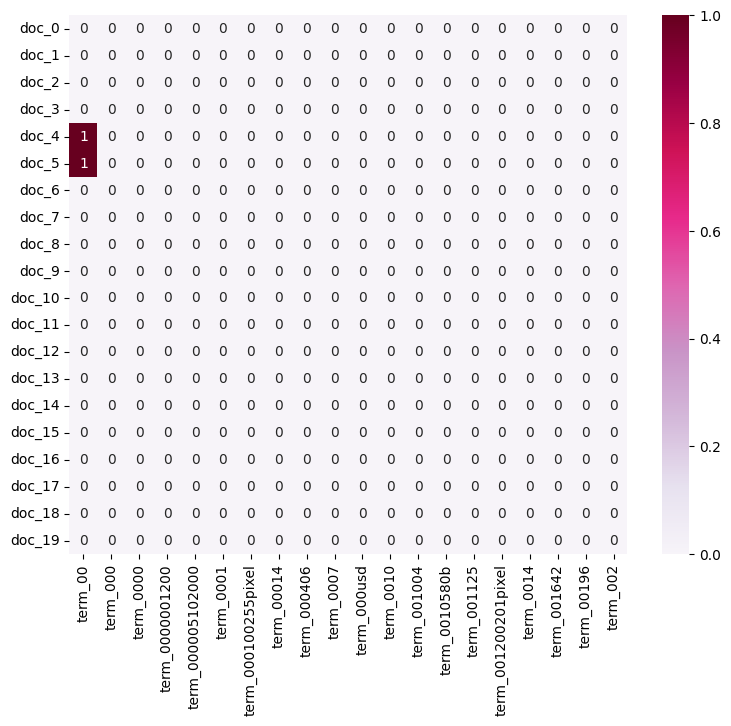

In [92]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# 圖太sparse(稀疏)了
# The plot is too sparse

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization.

從上圖我們可以看出term-document矩陣有多稀疏；即，在矩陣的子選擇中只有一項 **FREQUENCY** 為 `1`。順便說一句，您可能已經注意到，我們只選擇了 20 篇文章和 20 個術語來繪製直方圖。作為練習，您可以嘗試修改上面的程式碼以繪製整個術語文檔矩陣或僅繪製其中的一個範例。您將如何有效地做到這一點？記住詞彙中有很多單字。請在下面報告您將使用哪些方法來獲得漂亮且有用的視覺化效果

In [93]:
# Answer here


---

The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data Science. That's the motivation right there!

到目前為止，我們所做的事情的偉大之處在於，我們現在為新問題打開了大門。讓我們保持樂觀。儘管我們面臨著稀疏性和非常高維度資料的問題，但我們現在更接近從資料中發現奇蹟。你看，你為辛勤工作付出的代價是值得的，因為現在你從看似不相關的文章清單中獲得了很多知識。只需幾行程式碼就可以放大資料並找出資料集的有趣特徵，這一事實真正激勵了我實踐資料科學。這就是動機！

---

### 5.4 Attribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

除了應用降維技術來處理稀疏問題之外，我們還可以利用項向量矩陣做其他事情。在這裡，我們將產生所有整組文章中找到的單字的簡單分佈。直觀上，這可能沒有任何意義，但在數據科學中，有時我們認為某些事情是理所當然的，我們只需要在做出任何不成熟的結論之前先探索數據。在屬性轉換的主題上，我們將採用單字分佈並將分佈放在一個尺度上，以便於分析單字分佈的模式。讓我們開始吧！

First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.  

首先，我們需要計算所有文件中每個術語的頻率。從視覺上來說，我們正在尋求垂直添加 2D 矩陣的值；即每列的總和。您也可以將此過程稱為聚合，由於我們正在處理的資料類型，我們不會在本筆記本中進一步探討聚合。但我相信您已經了解其中包含的內容。

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [94]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
# 注意：這需要時間來計算。您可能希望減少要計算頻率的詞彙量
term_frequencies = [] # 用來存放每個詞的出現次數
for j in range(0,X_counts.shape[1]): # 遍歷 35788 個詞
    term_frequencies.append(sum(X_counts[:,j].toarray())) # 將每個詞的出現在所有文章中的次數加總

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [95]:
term_frequencies

[array([134]),
 array([92]),
 array([1]),
 array([2]),
 array([1]),
 array([3]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([3]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([3]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([5]),
 array([1]),
 array([13]),
 array([95]),
 array([4]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([4]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([2]),
 array([1]),
 array([59]),
 array([1]),
 array([4]),
 array([2]),
 array

In [96]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0] # 將原本的 list 轉換為 numpy array
term_frequencies

array([134,  92,   1, ...,   1,   1,   1])

In [97]:
term_frequencies[0] #sum of first term: 00  # 第一個詞 '00' 出現在所有文章中的次數

np.int64(134)

C:\Users\USER\AppData\Local\Temp\ipykernel_20364\882278432.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


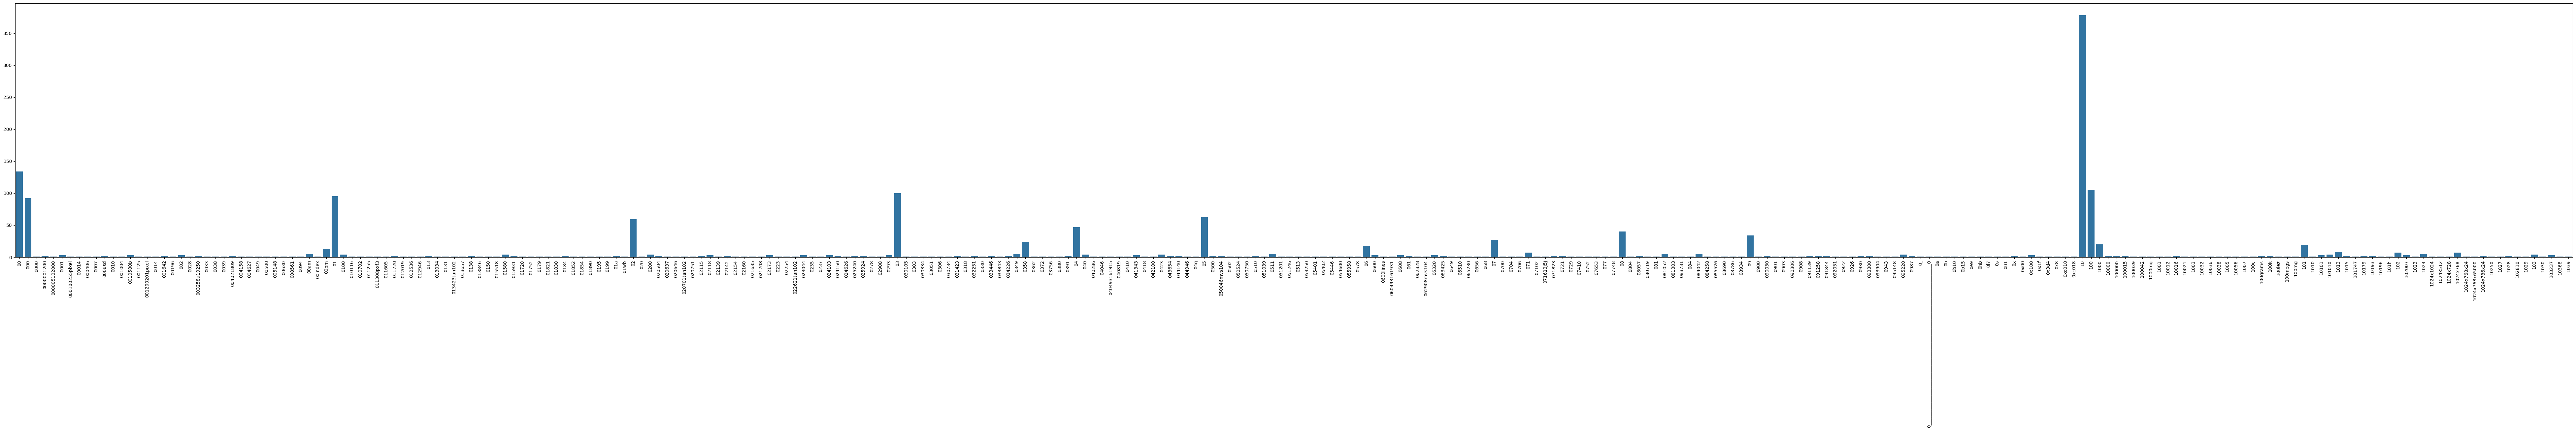

In [98]:
# After aggregating all the frequencies across all documents
# 在所有文件中聚合所有頻率後，將其繪製成直方圖

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

如果您想在這裡獲得更好的互動式視覺化效果，我鼓勵您嘗試安裝並使用plotly來實現這一點。

In [99]:
# Answer here
# to have a nicer interactive plot, we can use plotly
# 為了有一個更好的互動式圖，我們可以使用 plotly

import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

上面的圖表僅包含文件中的 300 個詞彙，計算和視覺化都已經是計算密集的。作為練習，您能否有效地減少想要視覺化的術語數量？

In [100]:
# Answer here


---

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

此外，您可以嘗試按頻率而不是按字母順序對 `x-axis`上的術語進行排序。這樣視覺化就更有意義，你將能夠觀察到所謂的[長尾](https://en.wikipedia.org/wiki/Long_tail)（熟悉這個術語，因為它會在數據中大量出現）採礦和其他統計課程）。見下圖

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [101]:
# Answer here



---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

由於我們已經有了這些項頻率，我們也可以將該向量中的值轉換為對數分佈。我們需要做的就是導入Python提供的 `math` 函式庫，並將其應用到詞頻向量的值數組中。這是一個典型的屬性變換的例子。讓我們一起努力。對數分佈是一種將術語頻率視覺化為比例的技術，可讓您輕鬆地以更易讀的格式視覺化分佈。換句話說，現在很容易觀察術語頻率之間的變化。讓我們來試試吧！

In [102]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
# help normalized data and make the patterns more discernible(able to be seen)
# 對每個詞的出現次數取對數，以便更好地可視化(因為有些詞出現次數太多，導致圖片不好看，如果取了對數，就可以更好地看到詞的分佈，因為取對數後，出現次數太多的詞會被壓縮)

C:\Users\USER\AppData\Local\Temp\ipykernel_20364\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



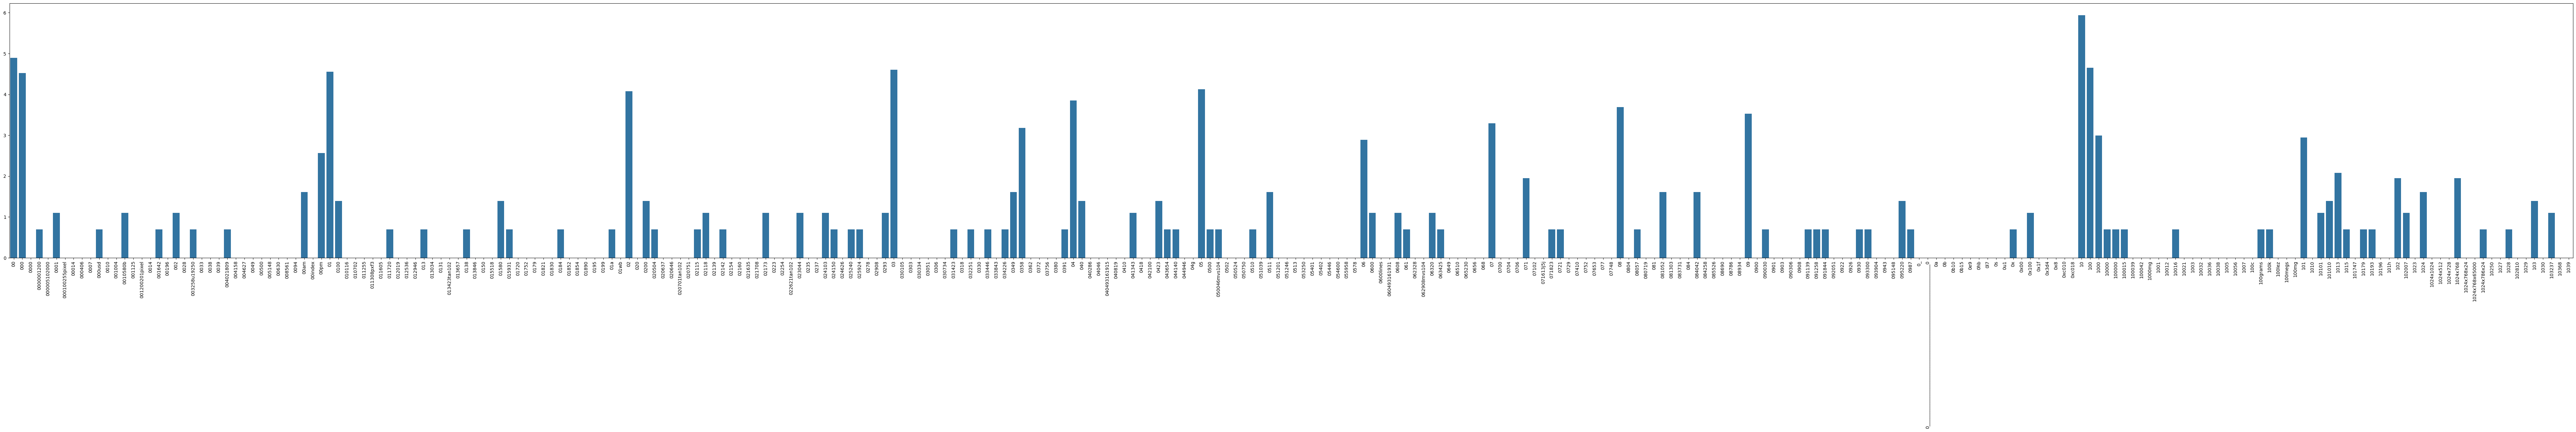

In [103]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

除了觀察分佈上的完整變換外，還要注意 y 軸上的比例。我們未排序範例中的日誌分佈沒有任何意義，但嘗試按頻率對術語進行正確排序，您將看到有趣的效果。大膽試試吧！

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

您可以複製上一個練習中的程式碼，並將 “term_frequencies” 變數更改為 “term_frequency_log”，評論您觀察到的差異，並討論我們可以從日誌分佈中獲得的其他可能的見解。

In [104]:
# Answer here


###  Finding frequent patterns

### 尋找頻繁模式

Perfect, so now that we know how to interpret a document-term matrix from our text data, we will see how to get extra insight from it, we will do this by mining frequent patterns. For this we will be using the PAMI library that we previously installed.


完美，現在我們知道如何從文字資料中解釋文檔術語矩陣，我們將了解如何從中獲得額外的見解，我們將透過挖掘頻繁模式來做到這一點。為此，我們將使用先前安裝的 PAMI 庫。

**Introduction to PAMI PAMI簡介**

PAMI (PAttern MIning) is a Python-based library designed to empower data scientists by providing the necessary tools to uncover hidden patterns within large datasets. Unlike other pattern mining libraries that are Java-based (such as WEKA and SPMF), PAMI caters specifically to the Python environment, making it more accessible for data scientists working with Big Data. The goal of PAMI is to streamline the process of discovering patterns that are often hidden within large datasets, offering a unified platform for applying various pattern mining techniques. In the library you can find a lot of implementations from current state-of-the-art algorithms, all of them cater to different type of data, they can be: transactional data, temporal data, utility data and some others. You can find more information in the following github: [PAMI](https://github.com/UdayLab/PAMI?tab=readme-ov-file). For the purpose of our lab we will be modeling our text data as a transactional type. So let's get into it.

PAMI（PAttern MIning）是一個基於 Python 的函式庫，旨在透過提供必要的工具來幫助資料科學家發現大型資料集中的隱藏模式。與其他基於 Java 的模式挖掘庫（例如 WEKA 和 SPMF）不同，PAMI 專門針對 Python 環境，使處理大數據的資料科學家更容易使用它。 PAMI 的目標是簡化發現通常隱藏在大型資料集中的模式的過程，為應用各種模式挖掘技術提供統一的平台。在該庫中，您可以找到當前最先進演算法的許多實現，它們都適合不同類型的數據，它們可以是：事務數據、時態數據、實用數據等。您可以在以下 github 中找到更多資訊：[PAMI](https://github.com/UdayLab/PAMI?tab=readme-ov-file)。出於實驗室的目的，我們將把文字資料建模為事務類型。那麼就讓我們開始吧。

**Transactional Data 交易數據**

In order to apply pattern mining techniques, we first need to convert our text data into transactional data. A transactional database is a set of transactions where each transaction consists of a unique identifier (TID) and a set of items. For instance, think of a transaction as a basket of items purchased by a customer, and the TID is like the receipt number. Each transaction could contain items such as "apple", "banana", and "orange".

為了應用模式挖掘技術，我們首先需要將文字資料轉換為事務資料。事務資料庫是一組事務，其中每個事務由唯一識別碼 (TID) 和一組項目組成。例如，將交易視為客戶購買的一籃子商品，TID 就像收據編號。每筆交易可以包含「蘋果」、「香蕉」和「橘子」等項目。

Here's an example of a transactional database:

以下是事務資料庫的範例：

TID	Transactions
1	a, b, c
2	d, e
3	a, e, f

In this structure:
TID refers to the unique identifier of each transaction (often ignored by PAMI to save storage space).
Items refer to the elements in each transaction, which could be either integers or strings (e.g., products, words, etc.).
When preparing text data, we need to transform sentences or documents into a similar format, where each sentence or document becomes a transaction, and the words within it become the items.

在這個結構中：
TID是指每筆交易的唯一識別碼（通常被PAMI忽略以節省儲存空間）。
項目是指每個交易中的元素，可以是整數或字串（例如產品、單字等）。
在準備文字資料時，我們需要將句子或文件轉換為類似的格式，其中每個句子或文件成為一個事務，其中的單字成為項目。

**Frequent Pattern Mining 頻繁模式挖掘**

After converting the text into a transactional format, we can then apply frequent pattern mining. This process identifies patterns or combinations of items that occur frequently across the dataset. For example, in text data, frequent patterns might be common word pairs or phrases that appear together across multiple documents. Important term to learn: **Minimum Support**: It refers to the minimum frequency that a transaction has to have to be considered a pattern in our scenario.

將文字轉換為事務格式後，我們可以應用頻繁模式挖掘。此過程可識別資料集中頻繁出現的項目的模式或組合。例如，在文字資料中，頻繁模式可能是在多個文件中一起出現的常見單字對或短語。需要學習的重要術語：**最低支援**：它是指在我們的場景中交易必須被視為模式的最低頻率。

PAMI allows us to mine various types of patterns, but for the purpuse of this lab we will explore the following types:

PAMI 讓我們可以挖掘各種類型的模式，但出於本實驗的目的，我們將探索以下類型：

**Patterns Above Minimum Support:** These are all patterns that meet a specified minimum support threshold. The result set can be quite large as it includes all frequent patterns, making it ideal for comprehensive analysis but potentially complex.

**高於最低支持的模式：** 這些都是滿足指定最低支持閾值的模式。結果集可能非常大，因為它包含所有頻繁模式，使其成為綜合分析的理想選擇，但可能很複雜。

**Maximal Frequent Patterns:** These are the largest frequent patterns that cannot be extended by adding more items without reducing their frequency below the minimum support threshold. The result set is smaller and more concise, as it only includes the largest patterns, reducing redundancy.

**最大頻繁模式：** 這些是最大的頻繁模式，無法透過增加更多項目來擴展而不將其頻率降低到最小支持閾值以下。結果集更小、更簡潔，因為它只包含最大的模式，減少了冗餘。

**Top-K Frequent Patterns:** These patterns represent the K most frequent patterns, regardless of the minimum support threshold. The result set is highly focused and concise, with a fixed number of patterns, making it ideal when prioritizing the most frequent patterns.

**前 K 個頻繁模式：** 這些模式代表 K 個最頻繁的模式，無論最小支持閾值是多少。結果集高度集中且簡潔，具有固定數量的模式，非常適合對最常見的模式進行優先排序。

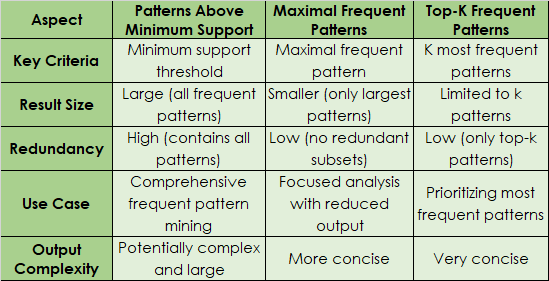

In the following steps, we will guide you through how to convert text data into transactional form and mine frequent patterns from it.

在以下步驟中，我們將指導您如何將文字資料轉換為事務形式並從中挖掘頻繁模式。


In our scenario, what we need is to mine patterns that can be representative to **each category**, in this way we will be able to differentiate each group of data more easily, for that we will need to first modify our document-term matrix to be able to work for each category, for this we will do the following:

在我們的場景中，我們需要的是挖掘能夠代表**每個類別**的模式，這樣我們就能夠更容易地區分每組數據，為此我們需要先修改我們的 document-term matrix 能夠適用於每個類別，為此我們將執行以下操作：

In [105]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels # 取得唯一的類別標籤
category_dfs = {}  # Dictionary to store DataFrames for each category # 用於存儲每個類別的 DataFrame 的字典

for category in categories:
    # Filter the original DataFrame by category
    # 通過類別篩選原始 DataFrame
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
# 用於為每個類別創建詞 - 文檔頻率 DataFrame 的函數
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer # 初始化 CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts # 將文本數據轉換為詞數
    
    # Get the unique words (vocabulary) from the vectorizer
    # 從向量化器中取得唯一的詞 (詞彙)
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    # 創建一個 DataFrame，其中行是文件，列是詞
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
# 為每個類別創建詞 - 文檔頻率 DataFrame
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category  # 用於存儲每個類別的詞 - 文檔 DataFrame 的字典

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])


# 以此類別舉例，類別為 'comp.graphics' 的這些 584 個文章 * 13756 個詞的 dataframe，當中每個詞在每篇文章中出現的次數
# # term_document_dfs['comp.graphics']

In [106]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
# 顯示其中一個類別的篩選 DataFrame，可以隨意更改向量中的數字
category_number = 3 # You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]] # Display the term-document frequency DataFrame for the selected category # 顯示所選類別的詞 - 文檔頻率 DataFrame


# row: each document; column: each word
# value: the number of occurences of each word in each document

Filtered Term-Document Frequency DataFrame for Category alt.atheism:


,00,000,000406,001125,01,0100,010116,011255,012536,013034,...,zlumber,zombie,zoo,zues,zumder,zur,zurlo,zus,zvonko,zyklon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
477,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we can see the number of unique words per category based on the column number in the new dataframe, feel free to **explore the changes of each category changing the vector number at the end**.

現在我們可以根據新資料框中的列號看到每個類別的唯一單字數，請隨意**探索每個類別的變化，改變最後的向量數量**。

In the past sections we saw the behaviour of each word frequency in the documents, but we still want to generalize a little bit more so we can observe and determine the data that we are going to use to mine the patterns. For this we will group the terms in bins and we are going to plot their frequency. Again, feel free to change the category number to explore the different results.

在過去的部分中，我們看到了文件中每個詞頻的行為，但我們仍然想進行更多概括，以便我們可以觀察並確定我們將用於挖掘模式的數據。為此，我們將把術語分組到箱中，並繪製它們的頻率。同樣，請隨意更改類別編號以探索不同的結果。

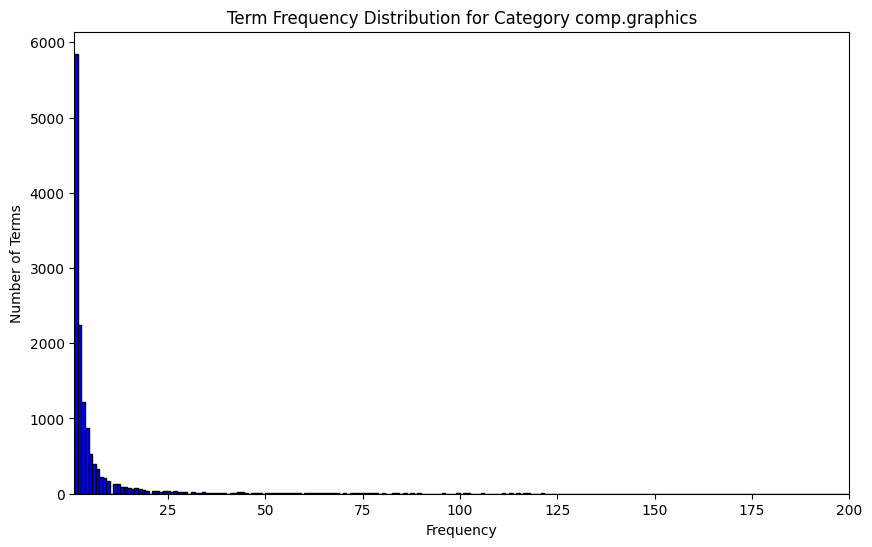

In [107]:
# want to know the distribution of words per category,
# because want to know the amount of common words that eah category has and the amout of rare words

# Sum over all documents to get total frequency for each word
# 對所有文件求和，以獲得每個詞的總頻率
category_number = 0 # You can change it from 0 to 3
# word counts 為每個詞在所有文章中出現的次數 # [34 17  1 ... 10  2  1]
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy() 

# Visualize the frequency distribution # 可視化頻率分佈
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

# 想要 filter 那些字在前 5% 和後 1% 的字，因為這些 words 可能沒有太多資訊 (不太 meaningful)
# 此圖為 'comp.graphics' 這個類別的詞頻分佈，也就是每個詞在所有文章中出現的次數，x 軸為出現次數，y 軸為詞的數量

From this graph, we can see that most of the words appear very infrequently across the entire dataset, while a small number of words appear quite often. When we're trying to find patterns in text data, we focus on combinations of words that are most helpful for classifying the documents. However, very rare words or extremely common words (like stopwords: 'the,' 'in,' 'a,' 'of,' etc.) don’t usually give us much useful information. To improve our results, we can filter out these words. Specifically, we'll remove the **bottom 1%** of the least frequent words and the **top 5%** of the most frequent ones. This helps us focus on words that might reveal more valuable patterns.

從該圖中，我們可以看到大多數單字在整個資料集中出現的頻率非常低，而少數單字出現的頻率卻很高。當我們嘗試在文字資料中尋找模式時，我們會專注於對文件分類最有幫助的單字組合。然而，非常罕見的單字或極其常見的單字（例如停用詞：「the」、「in」、「a」、「of」等）通常不會給我們太多有用的信息。為了改善我們的結果，我們可以過濾掉這些單字。具體來說，我們將刪除最不常見單字的**底部 1%** 和最常見單字的**頂部 5%**。這有助於我們專注於可能揭示更有價值模式的單字。

In this case, the choice of filtering the top 5% and bottom 1% is **arbitrary**, but in other applications, domain knowledge might guide us to filter words differently, depending on the type of text classification we're working on.

在這種情況下，過濾前5% 和後1% 的選擇是**任意的**，但在其他應用中，領域知識可能會指導我們以不同的方式過濾單詞，這取決於我們正在處理的文字分類類型。

Let us look first at the words that we will be filtering based on the set percentage threshold.

讓我們先看看我們將根據設定的百分比閾值過濾的單字。

In [108]:
category_number = 0 # You can change it from 0 to 3
# word_counts 為 0 這個類別的每個字在所有文章中出現的總次數 [34 17  1 ... 10  2  1]
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
# 將詞頻按降序排序 
# Get indices of sorted frequencies 取得排序後的詞數量的索引 # [12266 12390  9021 ...    10    11    12]
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies # 取得排序後的頻率的索引
# Sort frequencies in descending order 將 word_counts 由大到小排序 # [4537 2775 2470 ...    1    1    1]
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order # 將頻率按降序排序

# Calculate the index corresponding to the top 5% most frequent terms
# 計算對應於最頻繁的 5% 的詞的索引
total_terms = len(sorted_counts) # 總共有多少詞 # 13756
top_5_percent_index = int(0.05 * total_terms) #  取得最頻繁的前 5% 的詞的數量 # 687 個
# Get the indices of the top 5% most frequent terms
# 取得最頻繁的 5% 的詞的索引
top_5_percent_indices = sorted_indices[:top_5_percent_index]  # index 從 0 到 687-1 的那些詞的 index

# Filter terms that belong to the top 5% based on their rank
# 根據排名篩選屬於前 5% 的詞（column 為前 5% 的）
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}") # common words # 常見詞

Category: comp.graphics
Number of terms in top 5%: 687
Filtered terms: ['the', 'to', 'of', 'and', 'is', 'in', 'for', 'it', 'from', 'you', 'edu', 'that', 'on', 'this', 'or', 'be', 'with', 'have', 'lines', 'can', 'subject', 'are', 'graphics', 'if', 'organization', 'image', 'as', 'not', 'but', 'at', 'there', 'com', 'an', 'any', 'will', 'by', 'university', 're', 'about', 'some', 'posting', 'file', 'do', 'would', 'all', 'host', 'jpeg', 'what', 'so', 'has', 'nntp', 'files', 'which', 'one', 'also', 'me', 'use', 'software', 'was', 'images', 'my', 'writes', 'other', 'article', 'out', 'data', 'program', 'know', 'like', 'version', 'more', 'color', 'ftp', 'your', 'get', 'computer', 'don', '3d', 'does', 'no', 'mail', 'format', 'they', 'available', 'need', 'we', 'ca', 'thanks', 'just', 'bit', 'gif', 'how', 'help', 'am', 'please', 'package', 'pub', 'anyone', 'very', 'information', 'using', 'code', 'than', 'line', 'system', 'find', 'only', 'time', 'where', '24', 'windows', 'good', 'cs', 'uk', 'display

Here we can explore the frequencies of the **top 5%** words:

In [109]:
sorted_counts #We can see the frequencies sorted in a descending order

array([4537, 2775, 2470, ...,    1,    1,    1])

In [110]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([12266, 12390,  9021, ...,    10,    11,    12])

In [111]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

np.int64(4537)

In [112]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: comp.graphics
Number of terms in bottom 1%: 137
Filtered terms: ['0039', '0038', '0028', '00196', '001200201pixel', 'zillions', 'ziedman', 'zero_', '0199', '01890', '01854', '01852', '01821', '0179', '01752', '0150', 'zen', 'zeit', '02139', '020751', '020637', '020', 'zool', 'zoo', 'zirkel', 'zipped', '013846', 'zvi', '011605', '0100', 'ªl', '0049', '051201', '04g', '044946', '0410', '040819', '040493161915', '040286', 'zcat', 'zc', 'zbuffering', 'zaphod', 'zamenhof', 'z_c', 'yyqi', 'yy', 'yutani', '07653', '07410', '0729', '0704', '068', '0649', '060493161931', 'yr', 'youve', 'yourdon', 'yost', '0600', '054600', '05446', '05402', '053250', '0901', '0900', '08934', '08786', 'yktvmh', 'yk4', 'yingyong', 'yields', 'yielded', 'yield', 'yhe', 'yevtechenko', 'yevgeny', '083731', '080719', '077', '1001', '0xc018', '0xc010', '0x3d4', '0x1f', '0x00', '0hb', '0e9', '0b', '0a', '0______________________________________________________________________0', '0_', '0943', '0926', '092051', '

Here we can explore the frequencies of the **bottom 1%** words:

In [113]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([   1,    1,    1, ..., 2470, 2775, 4537])

In [114]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([   12,    11,    10, ...,  9021, 12390, 12266])

In [115]:
filt_term_document_dfs[categories[category_number]].loc[:,'l14h11'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

np.int64(1)

Well done, now that we have seen what type of words are inside the thresholds we set, then we can procede to **filter them out of the dataframe**. If you want to experiment after you complete the lab, you can return to try different percentages to filter, or not filter at all to do all the subsequent tasks for the pattern minings, and see if there is a significant change in the result.

幹得好，既然我們已經看到了我們設定的閾值內的單字類型，那麼我們可以繼續**將它們從 dataframe 中過濾掉**。如果您想在完成實驗後進行實驗，可以返回嘗試不同的百分比進行過濾，或者根本不過濾，以完成模式挖掘的所有後續任務，並查看結果是否有顯著變化。

In [116]:
category_number = 0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
# 根據它們在所有文件中的總和篩選前 1% 和後 5% 的詞
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    # 計算所有文件中每個詞的總和
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    # 將詞照總和排序，由小到大
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    # 計算要刪除的詞的數量
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    # 從前 5% 和後 1% 中取得要刪除的詞
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    # Here we print which words correspond to the bottom percentage we filter
    # 列出與我們篩選的底部百分比相對應的詞
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}')
    # Here we print which words correspond to the top percentage we filter
    # 列出與我們篩選的頂部百分比相對應的詞
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') 
    # Return the DataFrame without the filtered words
    # 返回不包含篩選詞的 DataFrame
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
# 對每個類別應用篩選函數
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
# 例子：顯示其中一個類別的篩選 DataFrame
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]
# 從 13756 去掉前 1% 和後 5% 的詞，剩下 12932 個詞


For category comp.graphics we filter the following words:
Bottom 1.0% words: 
0039              1
0038              1
0028              1
00196             1
001200201pixel    1
                 ..
10fps             1
10665             1
1066              1
xwindow           1
xwdtopnm          1
Length: 137, dtype: int64
Top 5.0% words: 
further      27
ii           27
27           27
martin       27
multi        27
           ... 
is         1751
and        2382
of         2470
to         2775
the        4537
Length: 687, dtype: int64

For category soc.religion.christian we filter the following words:
Bottom 1.0% words: 
0706           1
zeitschrift    1
zeal           1
zara           1
yves           1
              ..
prevented__    1
prevented      1
prevelant      1
preeminence    1
predicts       1
Length: 138, dtype: int64
Top 5.0% words: 
pagan         36
mmalt         36
reject        36
friend        36
parents       37
           ...  
that        4393
and         4409
to

,000,000005102000,000100255pixel,0007,000usd,0010580b,002,0094,00index,00pm,...,zopfi,zorg,zorn,zrz,zsoft,zt,zug,zurich,zyeh,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [117]:
# Answer here

Great! Now that our document-term frequency dataframe is ready, we can proceed with the frequent pattern mining process. To do this, we first need to convert our dataframe into a transactional database that the PAMI library can work with. We will generate a CSV file for each category to create this database.

偉大的！現在我們的文件術語頻率資料框已準備就緒，我們可以繼續進行頻繁模式挖掘過程。為此，我們首先需要將資料幀轉換為 PAMI 庫可以使用的交易資料庫。我們將為每個類別產生一個 CSV 檔案來建立此資料庫。

A key step in this process is defining the threshold that determines when a value in the data is considered a transaction. As we observed in the previous cell, there are **many zeros** in our dataframe, which indicate that certain words do not appear in specific documents. With this in mind, we'll set the transactional threshold to be **greater than or equal to 1**. This means that for each document/transaction, we will include all the words that occur at least once (after filtering), ensuring that only relevant words are included in the pattern mining process. For your reference you can also check the following real world example that the PAMI library provides to review how they chose the threshold to generate the transactional data: [Air Pollution Analytics - Japan](https://colab.research.google.com/github/udayLab/PAMI/blob/main/notebooks/airPollutionAnalytics.ipynb). 

此過程中的關鍵步驟是定義閾值，該閾值確定資料中的值何時被視為交易。正如我們在上一個單元格中觀察到的，我們的資料框中有**許多零**，這表明某些單字沒有出現在特定文件中。考慮到這一點，我們將交易閾值設為 **大於或等於 1**。這意味著對於每個文件/交易，我們將包含至少出現一次（過濾後）的所有單詞，確保模式挖掘過程中僅包含相關單詞。作為參考，您還可以查看 PAMI 庫提供的以下真實世界範例，以了解他們如何選擇產生交易資料的閾值：[空氣污染分析 - 日本](https://colab.research.google.com/ github/udayLab /PAMI/blob/main/notebooks/airPollutionAnalytics.ipynb）。

#### The next part of the code will take a couple of minutes to execute, for simplicity I already shared the resulting files from it, to continue onwards

#### 程式碼的下一部分將需要幾分鐘的時間來執行，為簡單起見，我已經共享了其中的結果文件，以便繼續繼續

In [118]:
# # from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
#                                                         #gives you trouble
# from PAMI.extras.convert.DF2DB import DF2DB            

# # Loop through the dictionary of term-document DataFrames
# for category in term_document_dfs:
#     # Replace dots with underscores in the category name to avoid errors in the file creation
#     category_safe = category.replace('.', '_')
    
#     # Create the DenseFormatDF object and convert to a transactional database
#     # obj = db.DenseFormatDF(term_document_dfs[category]) #Uncomment this line and comment the line below if this block of code 
#                                                          #gives you trouble
#     obj = DF2DB(term_document_dfs[category])           
        
#     obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Now let us look into the stats of our newly created transactional databases, we will observe the following:

現在讓我們查看新建立的事務資料庫的統計數據，我們將觀察到以下內容：

- **Database Size (Total Number of Transactions)**: Total count of transactions in the dataset.

    - **資料庫大小（交易總數）**：資料集中的交易總數。

- **Number of Items**: Total count of unique items available across all transactions.

    - **商品數量**：所有交易中可用的唯一商品總數。

- **Minimum Transaction Size**: Smallest number of items in any transaction, indicating the simplest transaction.

    - **最小交易規模**：任何交易中的最小項目數，表示最簡單的交易。

- **Average Transaction Size**: Mean number of items per transaction, showing the typical complexity.

    - **平均交易大小**：每筆交易的平均項目數，顯示典型的複雜性。

- **Maximum Transaction Size**: Largest number of items in a transaction, representing the most complex scenario.

    - **最大交易規模**：交易中最大的項目數量，代表最複雜的場景。

- **Standard Deviation of Transaction Size**: Measures variability in transaction sizes; higher values indicate greater diversity.

    - **交易規模的標準差**：衡量交易規模的變異性；數值越高表示多樣性越大。

- **Variance in Transaction Sizes**: Square of the standard deviation, providing a broader view of transaction size spread.

    - **交易規模的變異數**：標準差的平方，提供更廣泛的交易規模分佈視圖。

- **Sparsity**: Indicates the proportion of possible item combinations that do not occur, with values close to 1 showing high levels of missing combinations.

    - **稀疏性**：表示未出現的可能項目組合的比例，數值接近 1 表示缺失組合的程度較高。


With regards to the graphs we will have: 關於圖表，我們將得到：

- **Item Frequency Distribution**
    - Y-axis (Frequency): Number of transactions an item appears in.
    - X-axis (Number of Items): Items ranked by frequency.

- **項目頻率分佈**
    - Y 軸（頻率）：商品出現的交易數量。
    - X 軸（項目數）：依頻率排名的項目。

- **Transaction Length Distribution**
    - Y-axis (Frequency): Occurrence of transaction lengths.
    - X-axis (Transaction Length): Number of items per transaction.

- **交易長度分佈**
    - Y 軸（頻率）：交易長度的出現。
    - X 軸（交易長度）：每次交易的商品數量。

Database size (total no of transactions) : 584
Number of items : 12932
Minimum Transaction Size : 4
Average Transaction Size : 56.41267123287671
Maximum Transaction Size : 2063
Standard Deviation Transaction Size : 152.52064505570053
Variance in Transaction Sizes : 23302.448621325693
Sparsity : 0.995637745806304


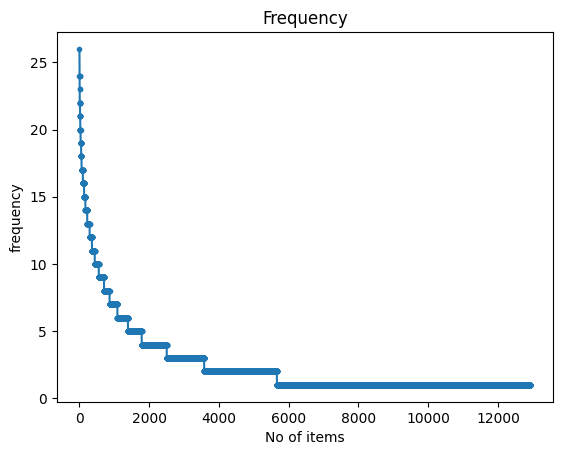

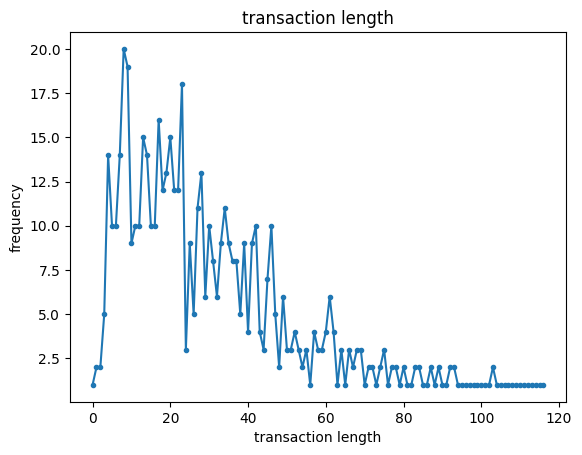

In [119]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv')
obj.run() # get the statistics and plots # 獲取統計信息和圖表
obj.printStats() # print the statistics # 打印統計信息
obj.plotGraphs() # plot the graphs # 繪製圖表

# first graph: x-axis represents items ranked by frequency, y-axis represents the number of transactions an item appears in
# 第一個圖：x 軸表示每個詞按照出現次數排名，y 軸表示該詞出現在多少篇文章中
# second graph: x-axis represents the number of items per transaction, y-axis represents occurrence of transaction lengths
# 第二個圖：x 軸表示每篇文章中的詞數，y 軸表示文章長度的出現次數

# Database size (total no of transactions) : 131  表示文章數量 131 篇
# Number of items : 5940  表示在這些文章中所有出現過的詞有 5940 種
# Minimum Transaction Size : 9  表示所有文章中出現最少的詞數為 9 個
# Average Transaction Size : 69.52671755725191  表示平均每篇文章中出現的詞數為 69.53 個
# Maximum Transaction Size : 2037  表示所有文章中出現最多的詞數為 2037 個
# Standard Deviation Transaction Size : 208.3548546815702  表示文章中詞數的標準差為 208.35
# Variance in Transaction Sizes : 43745.681972988845  表示文章中詞數的變異數為 43745.68
# Sparsity : 0.988295165394402  表示沒有出現的詞組合占比（越接近 1 表示缺失的組合越多）

# the first graph shows that most items appear in less than 10 transactions
# 第一個圖顯示大多數詞出現在少於 10 篇文章中
# the second graphs shows that most transactions have a length of around 50-100 items
# 第二個圖顯示大多數文章的詞數在 50-100 個之間

# threshold 設在 9 表示 most of these really big transactions will be filtered and can get most frequent item
# # 這裡 threshold 設在 9 表示大多數這些非大量的文章將被過濾掉，可以獲得最頻繁的項目

Database size (total no of transactions) : 594
Number of items : 15283
Minimum Transaction Size : 9
Average Transaction Size : 74.55892255892256
Maximum Transaction Size : 1070
Standard Deviation Transaction Size : 115.43440452043433
Variance in Transaction Sizes : 13347.572407606136
Sparsity : 0.9951214471923757


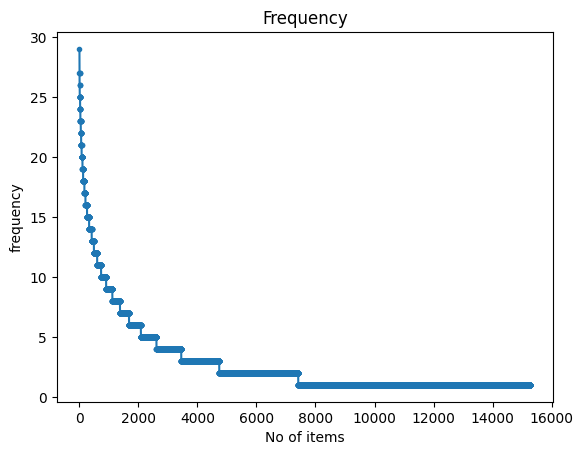

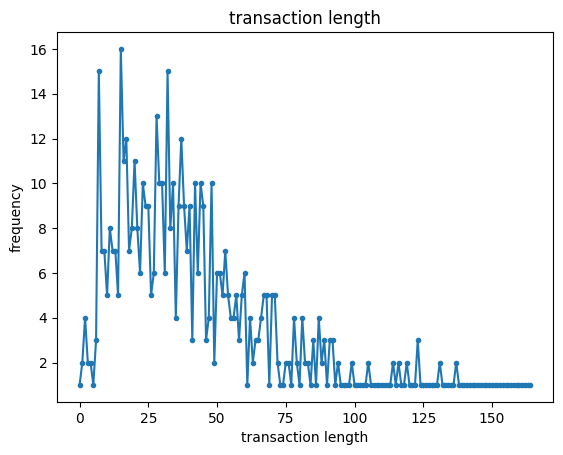

In [120]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_sci_med.csv')
obj.run() # get the statistics and plots    # 獲取統計信息和圖表
obj.printStats() # print the statistics    # 打印統計信息
obj.plotGraphs() # plot the graphs    # 繪製圖表

# first graph: x-axis represents items ranked by frequency, y-axis represents the number of transactions an item appears in
# 第一個圖：x 軸表示每個詞按照出現次數排名，y 軸表示該詞出現在多少篇文章中
# second graph: x-axis represents the number of items per transaction, y-axis represents occurrence of transaction lengths
# 第二個圖：x 軸表示每篇文章中的詞數，y 軸表示文章長度的出現次數

Database size (total no of transactions) : 599
Number of items : 13041
Minimum Transaction Size : 2
Average Transaction Size : 77.04507512520868
Maximum Transaction Size : 460
Standard Deviation Transaction Size : 62.384260554199
Variance in Transaction Sizes : 3898.3039849023735
Sparsity : 0.9940920884038641


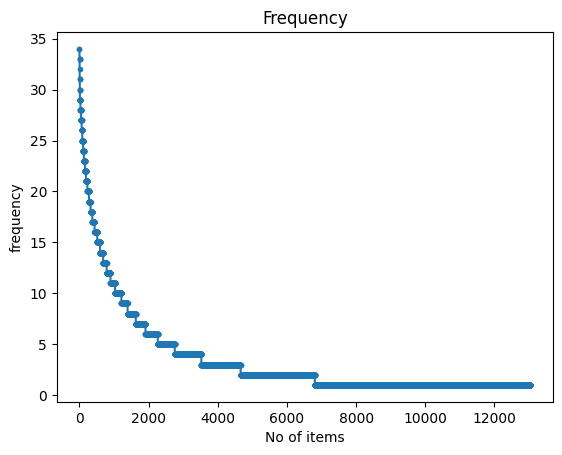

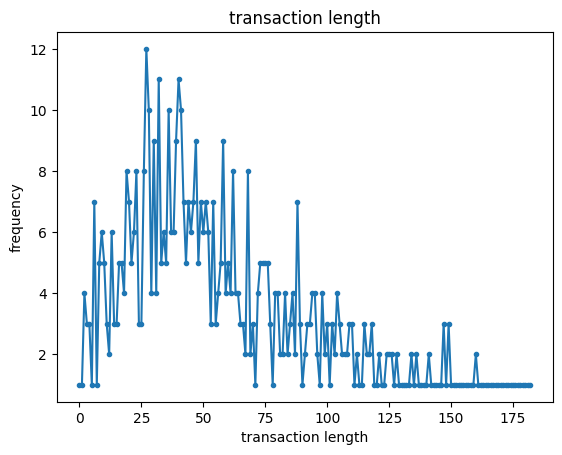

In [121]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_soc_religion_christian.csv')
obj.run() # get the statistics and plots    # 獲取統計信息和圖表
obj.printStats() # print the statistics    # 打印統計信息
obj.plotGraphs() # plot the graphs    # 繪製圖表

# first graph: x-axis represents items ranked by frequency, y-axis represents the number of transactions an item appears in
# 第一個圖：x 軸表示每個詞按照出現次數排名，y 軸表示該詞出現在多少篇文章中
# second graph: x-axis represents the number of items per transaction, y-axis represents occurrence of transaction lengths
# 第二個圖：x 軸表示每篇文章中的詞數，y 軸表示文章長度的出現次數

Database size (total no of transactions) : 480
Number of items : 11250
Minimum Transaction Size : 5
Average Transaction Size : 75.59791666666666
Maximum Transaction Size : 1395
Standard Deviation Transaction Size : 105.33869380396925
Variance in Transaction Sizes : 11119.405841162144
Sparsity : 0.9932801851851852


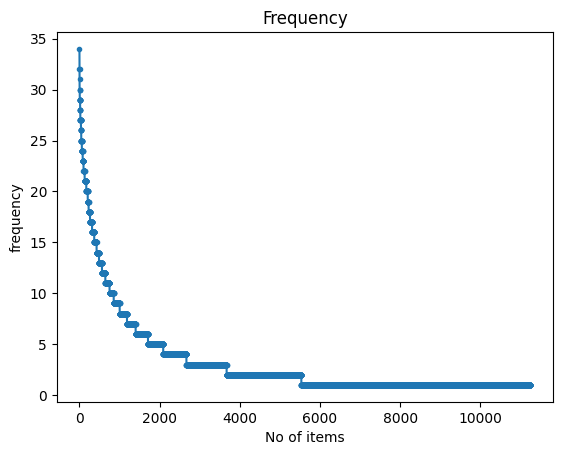

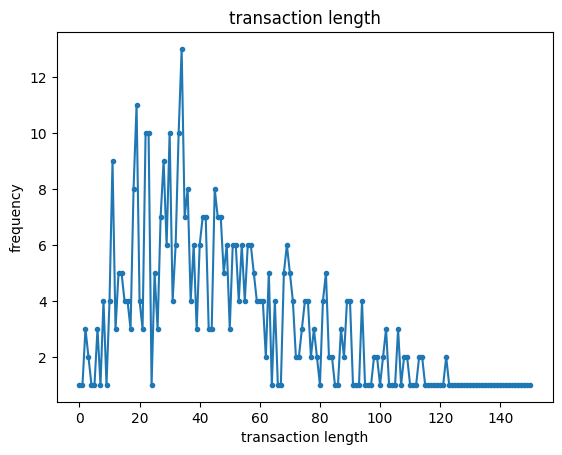

In [122]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_alt_atheism.csv')
obj.run() # get the statistics and plots    # 獲取統計信息和圖表
obj.printStats() # print the statistics    # 打印統計信息
obj.plotGraphs() # plot the graphs    # 繪製圖表

# first graph: x-axis represents items ranked by frequency, y-axis represents the number of transactions an item appears in
# 第一個圖：x 軸表示每個詞按照出現次數排名，y 軸表示該詞出現在多少篇文章中
# second graph: x-axis represents the number of items per transaction, y-axis represents occurrence of transaction lengths
# 第二個圖：x 軸表示每篇文章中的詞數，y 軸表示文章長度的出現次數

Now that we have reviewed the stats of our databases, there are some things to notice from them, the total number of transactions refer to the amount of documents per category, the number of items refer to the amount of unique words encountered in each category, the transaction size refers to the amount of words per document that it can be found, and we can see that our databases are very sparse, this is the result of having many zeros in the first place when making the document-term matrix. 

現在我們已經查看了資料庫的統計數據，有一些事情需要注意，事務總數是指每個類別的文檔數量，項目數量是指每個類別中遇到的唯一單字的數量，事務大小是指每個文檔可以找到的單字數量，我們可以看到我們的資料庫非常稀疏，這是在製作文檔術語矩陣時首先有很多零的結果。

Why are these stats important? It is because we are going to use the FPGrowth algorithm from PAMI, and for that we need to determine the *minimum support* (frequency) that our algorithm will use to mine for patterns in our transactions. 

為什麼這些統計數據很重要？這是因為我們將使用 PAMI 的 FPGrowth 演算法，為此我們需要確定我們的演算法用於挖掘交易模式的「最小支援」（頻率）。

When we set a minimum support threshold (minSup) for finding frequent patterns, we are looking for a good balance. We want to capture important patterns that show real connections in the data, but we also want to avoid too many unimportant patterns. For this dataset, we've chosen a minSup of 9. We have done this after observing the following:

當我們設定用於尋找頻繁模式的最小支持閾值 (minSup) 時，我們正在尋找良好的平衡。我們希望捕捉顯示資料中真實聯繫的重要模式，但我們也希望避免太多不重要的模式。對於此資料集，我們選擇了 minSup 為 9。

- **Item Frequency**: The first graph shows that most items don't appear very often in transactions. There's a sharp drop in how frequently items appear, which means our data has many items that aren't used much.

    - **項目頻率**：第一個圖表顯示大多數項目在交易中不會經常出現。項目出現的頻率急劇下降，這意味著我們的數據中有許多項目沒有被經常使用。

- **Transaction Length**: The second graph shows that most transactions involve a small number of items. The most common transaction sizes are small, which matches our finding that the dataset does not group many items together often.

    - **交易長度**：第二張圖顯示大多數交易涉及少量項目。最常見的交易規模很小，這與我們的發現相符，即資料集不會經常將許多項目分組在一起。

By setting minSup at 9, we focus on combinations of items that show up in these smaller, more common transactions. This level is low enough to include items that show up more than just a few times, but it's high enough to leave out patterns that don't appear often enough to be meaningful. This helps us keep our results clear and makes sure the patterns we find are useful and represent what's really happening in the dataset. 

透過將 minSup 設為 9，我們專注於這些較小、更常見的交易中出現的項目組合。這個等級夠低，可以包含出現次數不只幾次的項目，但也夠高，可以忽略那些出現頻率不高、沒有意義的模式。這有助於我們保持結果清晰，並確保我們找到的模式有用並代表資料集中真正發生的情況。

**This value works for all categories**. Now let's get into mining those patterns. For more information you can visit the FPGrowth example in PAMI for transactional data: [FPGrowth Example](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/basic/FPGrowth.ipynb#scrollTo=pLV84IYcDHe3).

**此值適用於所有類別**。現在讓我們開始挖掘這些模式。有關更多信息，您可以訪問PAMI 中的FPGrowth 示例以獲取事務數據：[FPGrowth 示例](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/basic /FPGrowth。

In [123]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9 # threshold for the minimum support # 最小支持度的閾值
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup) # create an object of the FPGrowth class # 創建 FPGrowth 類的對象
obj1.mine() # mine the frequent patterns # 挖掘頻繁模式
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame() # get the frequent patterns as a DataFrame # 將頻繁模式作為 DataFrame 獲取
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns # 打印總模式數
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime # 測量運行時間

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.2760887145996094


In [124]:
obj1.save('freq_patterns_sci_med_minSup9.txt') #save the patterns  # 保存模式
frequentPatternsDF_sci_med # display the frequent patterns # 顯示頻繁模式

,Patterns,Support
0,leave,9
1,swell,9
2,color,9
3,confused,9
4,learning,9
...,...,...
9995,means,27
9996,haven,27
9997,happen,27
9998,originator,27


In [125]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 2.420095682144165


In [126]:
obj2.save('freq_patterns_alt_atheism_minSup9.txt') #save the patterns
frequentPatternsDF_alt_atheism

,Patterns,Support
0,choices,9
1,corp,9
2,hausmann,9
3,hausmann maddi,9
4,kids,9
...,...,...
4671,date,31
4672,date gmt,19
4673,stay,32
4674,snm6394,32


In [127]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) # print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) # measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.23162031173706055


In [128]:
obj3.save('freq_patterns_comp_graphics_minSup9.txt') # save the patterns
frequentPatternsDF_comp_graphics

,Patterns,Support
0,individual,9
1,certain,9
2,hall,9
3,mike,9
4,vr,9
...,...,...
33569,life,24
33570,ideas,24
33571,feel,24
33572,tried,24


In [129]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.5306634902954102


In [130]:
obj4.save('freq_patterns_soc_religion_minSup9.txt') #save the patterns
frequentPatternsDF_soc_religion_christian

,Patterns,Support
0,latest,9
1,san,9
2,seven,9
3,schools,9
4,chose,9
...,...,...
11208,34,33
11209,institute,33
11210,ways,33
11211,oh,34


Now that we've extracted the transactional patterns from our databases, the next step is to integrate them effectively with our initial data for further analysis. One effective method is to identify and use only the unique patterns that are specific to each category. This involves filtering out any patterns that are common across multiple categories.

現在我們已經從資料庫中提取了事務模式，下一步是將它們與我們的初始資料有效地整合以進行進一步分析。一種有效的方法是僅識別和使用每個類別特有的獨特模式。這涉及過濾掉多個類別中常見的任何模式。

The reason for focusing on **unique patterns** is that they can **significantly improve the classification process**. When a document contains these distinctive patterns, it provides clear, category-specific signals that help our model more accurately determine the document's category. This approach ensures that the patterns we use enhance the model's ability to distinguish between different types of content.

關注**獨特模式**的原因是它們可以**顯著改進分類過程**。當文件包含這些獨特的模式時，它會提供清晰的、特定於類別的訊號，幫助我們的模型更準確地確定文件的類別。這種方法確保我們使用的模式增強模型區分不同類型內容的能力。

In [131]:
import pandas as pd

# We group together all of the dataframes related to our found patterns
# 我們將所有與我們找到的模式相關的數據框分組在一起
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# 找出出現在多個類別中的模式
# Count how many times each pattern appears across all dataframes
# 計算每個模式在所有數據框中出現的次數
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
# 過濾出現在多個數據框中的模式
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
# 計算所有類別中的總模式數
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
# 計算丟棄了多少模式
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
# 對於每個類別，過濾模式，只保留唯一的模式
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
# 將過濾後的數據框合併到最終數據框中
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
# 按支持度排序
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
# 顯示最終結果
print(final_pattern_df)
# Print the number of discarded patterns
# 打印丟棄的模式數量
print(f"Number of patterns discarded: {discarded_patterns_count}")

         Patterns  Support
19912   institute       33
19911         gov       33
57158     snm6394       32
19910        form       31
19909          08       30
...           ...      ...
11        holland        9
10         deeply        9
9        unlikely        9
8      transplant        9
7       recurrent        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


We observed a significant number of patterns that were common across different categories, which is why we chose to discard them. The next step is to integrate these now category-specific patterns into our data. How will we do this? By converting the patterns into binary data within the columns of our document-term matrix. Specifically, we will check each document for the presence of each pattern. If a pattern is found in the document, we'll mark it with a '1'; if it's not present, we'll mark it with a '0'. This binary encoding allows us to effectively augment our data, enhancing its utility for subsequent classification tasks.

我們觀察到大量不同類別中常見的模式，這就是我們選擇丟棄它們的原因。下一步是將這些現在特定於類別的模式整合到我們的資料中。我們將如何做到這一點？透過將模式轉換為文件術語矩陣列中的二進位資料。具體來說，我們將檢查每個文件是否存在每種模式。如果在文件中找到模式，我們將用「1」標記它；如果它不存在，我們將用“0”標記它。這種二元編碼使我們能夠有效地增強數據，增強其對後續分類任務的實用性。

In [132]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
# 使用 CountVectorizer 將 'text' 列轉換為詞 - 文檔矩陣
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data   包含您的文本數據
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary   詞彙中的原始詞

# Tokenize the sentences into sets of unique words
# 將句子分詞為唯一單詞集
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
# 初始化模式矩陣
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
# 遍歷每個模式，檢查模式中的所有單詞是否出現在分詞的句子中
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
# 將詞 - 文檔矩陣轉換為 DataFrame 以便於合併
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
# 連接原始 TDM 和模式矩陣以增加特徵
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,192 means,quackery,newsreader pl8 tin,pl8 tin,pl8 newsreader,holland,deeply,unlikely,transplant,recurrent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

實作 PAMI 庫中的 FAE Top-K 和 MaxFPGrowth 演算法來分析我們處理的資料庫中的「comp.graphics」類別。 **僅實現演算法的挖掘部分並顯示結果模式**，就像我們在創建新資料庫後使用 FPGrowth 演算法所做的那樣。對於 FAE Top-K，使用 k 值 500、1000 和 1500 運行試驗，記錄每個的運行時間。對於 MaxFPGrowth，測試最小支援閾值 3、6 和 9，同時注意這些設定的運行時間。將這些演算法提取的模式與先前實現的 FPGrowth 演算法提取的模式進行比較。記錄您的發現，並專注於產出和績效的差異和相似之處。

In [133]:
# Answer Here


---

### 5.5 Dimensionality Reduction 降維

Dimensionality reduction is a powerful technique for tackling the "curse of dimensionality," which commonly arises due to data sparsity. This technique is not only beneficial for visualizing data more effectively but also simplifies the data by reducing the number of dimensions without losing significant information. For a deeper understanding, please refer to the additional notes provided.

降維是解決「維數災難」的強大技術，「維數災難」通常是由於資料稀疏而引起的。該技術不僅有利於更有效地視覺化數據，還可以透過減少維度來簡化數據，而不會失去重要資訊。如需更深入的理解，請參閱提供的附加註釋。

We will start with **Principal Component Analysis (PCA)**, which is focused on finding a projection that captures the largest amount of variation in the data. PCA is excellent for linear dimensionality reduction and works well when dealing with Gaussian distributed data. However, its effectiveness diminishes with non-linear data structures.

我們將從 **主成分分析 (PCA)** 開始，其重點是找到捕獲資料中最大變化量的投影。 PCA 非常適合線性降維，並且在處理高斯分佈資料時效果很好。然而，它的有效性隨著非線性資料結構而減弱。

Additionally, we will explore two advanced techniques suited for non-linear dimensionality reductions:

此外，我們將探索兩種適合非線性降維的先進技術：

- **t-Distributed Stochastic Neighbor Embedding (t-SNE) t-分佈式隨機鄰域嵌入 (t-SNE)**:
    - Pros 優點 :
        - Effective at revealing local data structures at many scales.
            - 有效地揭示多種規模的本地資料結構。
        - Great for identifying clusters in data.
            - 非常適合識別資料中的簇。
    - Cons 缺點 :
        - Computationally intensive, especially with large datasets.
            - 運算密集型，尤其是大型資料集。
        - Sensitive to parameter settings and might require tuning (e.g., perplexity).
            - 對參數設定敏感，可能需要調整（例如，困惑）
        
- **Uniform Manifold Approximation and Projection (UMAP) 統一流形逼近和投影（UMAP）**:
    - Pros 優點 :
        - Often faster than t-SNE and can handle larger datasets.
            - 通常比 t-SNE 更快，並且可以處理更大的資料集。
        - Less sensitive to the choice of parameters compared to t-SNE.
            - 與 t-SNE 相比，對參數選擇較不敏感。
        - Preserves more of the global data structure while also revealing local structure.
            - 保留更多的全域資料結構，同時也揭示局部結構。
    - Cons 缺點 :
        - Results can still vary based on parameter settings and random seed.
            - 結果仍可能因參數設定和隨機種子而異。
        - May require some experimentation to find the optimal settings for specific datasets.
            - 可能需要一些實驗才能找到特定資料集的最佳設定。
        
These methods will be applied to visualize our data more effectively, each offering unique strengths to mitigate the issue of sparsity and allowing us to observe underlying patterns in our dataset.

這些方法將用於更有效地可視化我們的數據，每種方法都提供獨特的優勢來緩解稀疏性問題，並允許我們觀察資料集中的潛在模式。

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
[t-SNE Algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
[UMAP Algorithm](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)

**Input:** Raw term-vector matrix 原始項向量矩陣

**Output:** Projections 預測


So, let's experiment with something interesting, from our previous work we have our data with only the document-term frequency data and also the one with both the document-term frequency and the pattern derived data, let's try to create a 2D plot after applying these algorithms to our dataframes and see what comes out.

因此，讓我們嘗試一些有趣的事情，在我們之前的工作中，我們的數據僅包含文檔術語頻率數據，還有同時包含文檔術語頻率和模式派生數據的數據，讓我們嘗試在應用後創建一個2D圖將這些演算法加入我們的資料幀中，看看會產生什麼結果。

In [134]:
# Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# import umap
import umap.umap_ as umap  # 正確的導入方式
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [135]:
X_pca_tdm.shape

(2257, 2)

In [136]:
X_tsne_tdm.shape

(2257, 2)

In [137]:
X_umap_tdm.shape

(2257, 2)

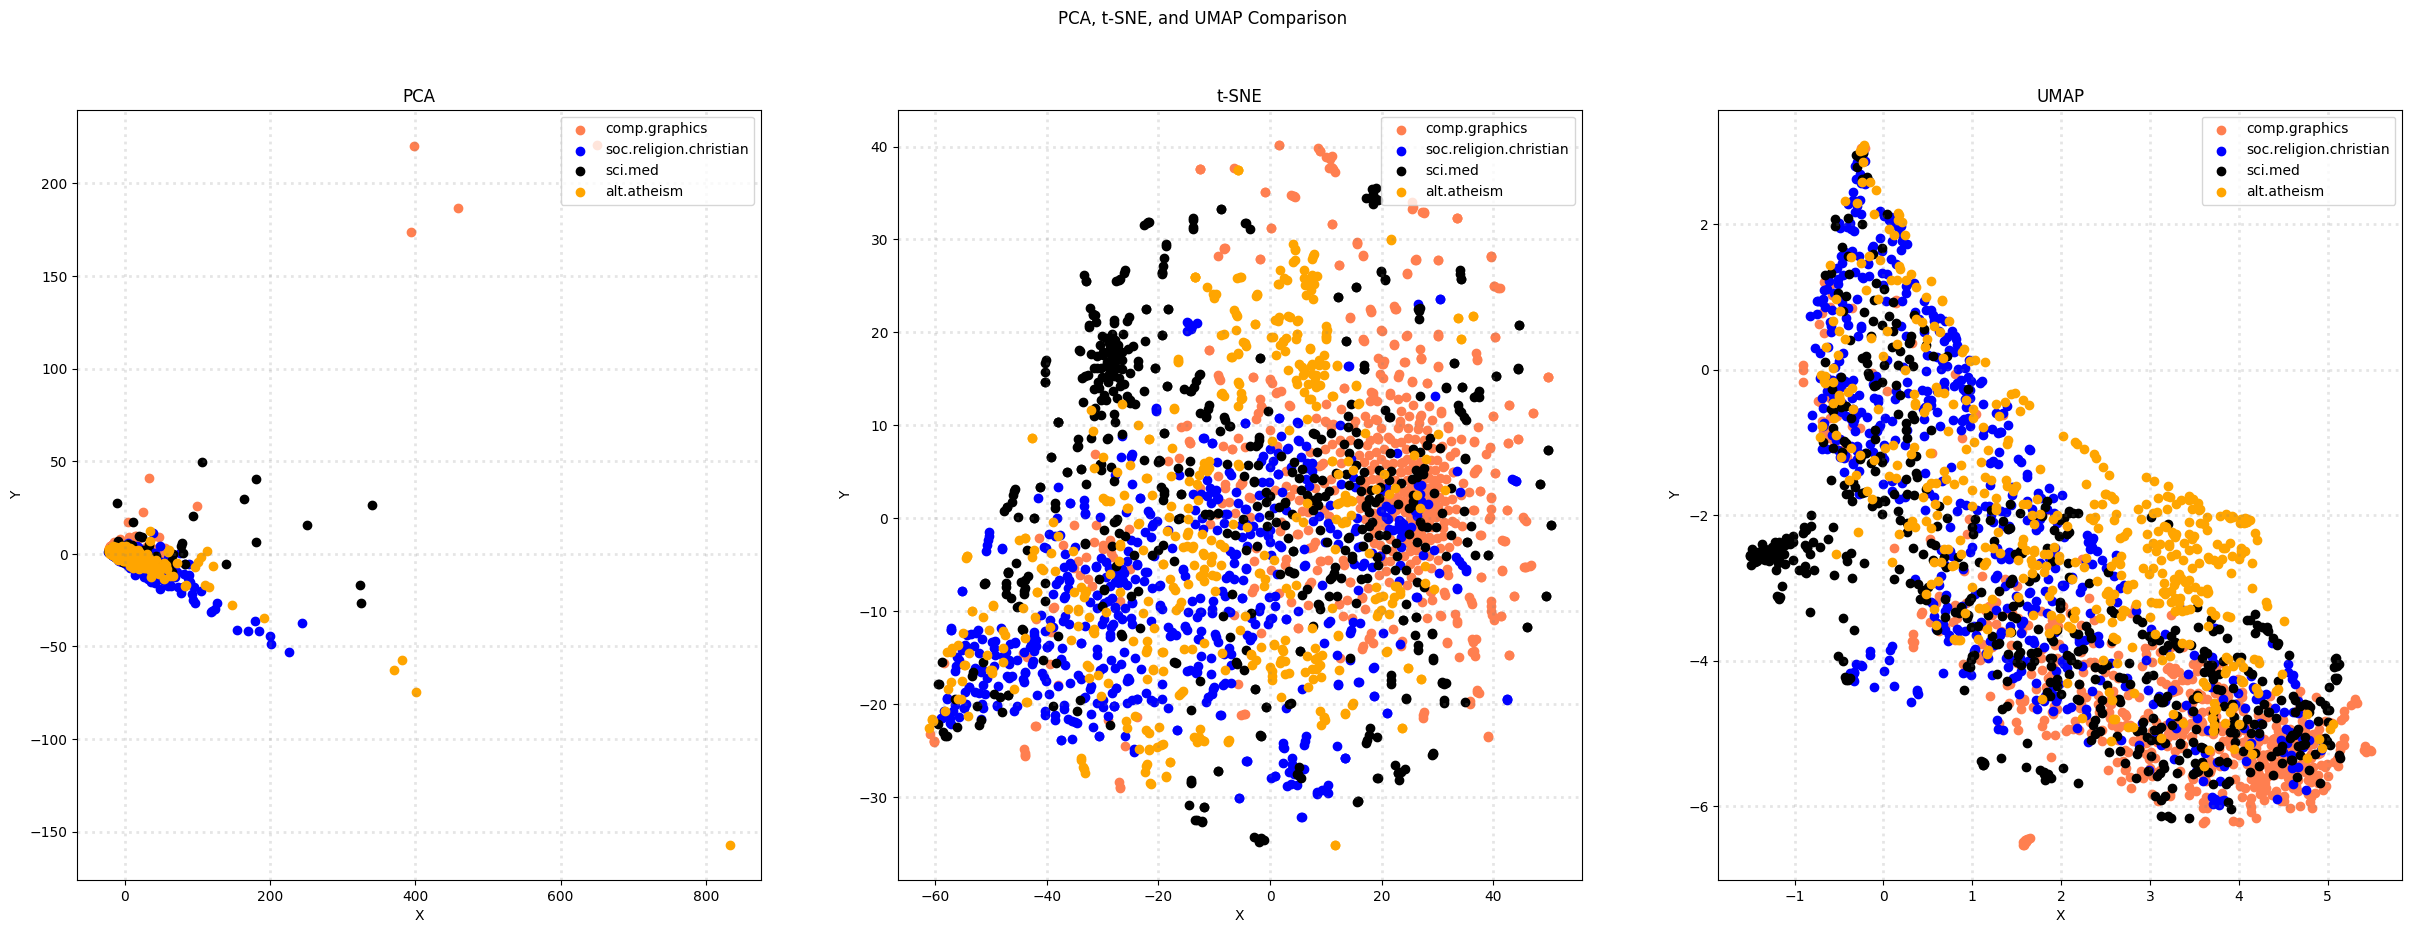

In [138]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

From the 2D PCA visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by category, but it is not immediately clear. In the t-SNE graph we observe a more scattered distribution, but still intermixing with all the categories. And with the UMAP graph, the limits for the data seem pretty well defined, two categories seem to have some points well differentiated from the other classes, but most of them remain intermixed. The algorithms were applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

從上面的 2D PCA 視覺化中，我們可以看到輕微的「資料中分離的跡象」；即，它們可能按類別進行一些特殊分組，但目前尚不清楚。在 t-SNE 圖中，我們觀察到分佈更加分散，但仍與所有類別混合。透過 UMAP 圖，資料的限制似乎定義得很好，兩個類別似乎有一些點與其他類別有很好的區別，但大多數仍然混合在一起。這些演算法應用於原始頻率，這被認為是一種非常幼稚的方法，因為某些單字並不是文件所獨有的。僅按詞頻分類才被視為“詞袋”方法。在課程的後面，您將學習如何從 term-vector 矩陣中創建更好的特徵的不同方法，例如 term-frequency inverse document frequency，即所謂的 TF-IDF。

Now let's try in tandem with our pattern augmented data:

現在讓我們嘗試結合我們的模式增強數據：

In [139]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

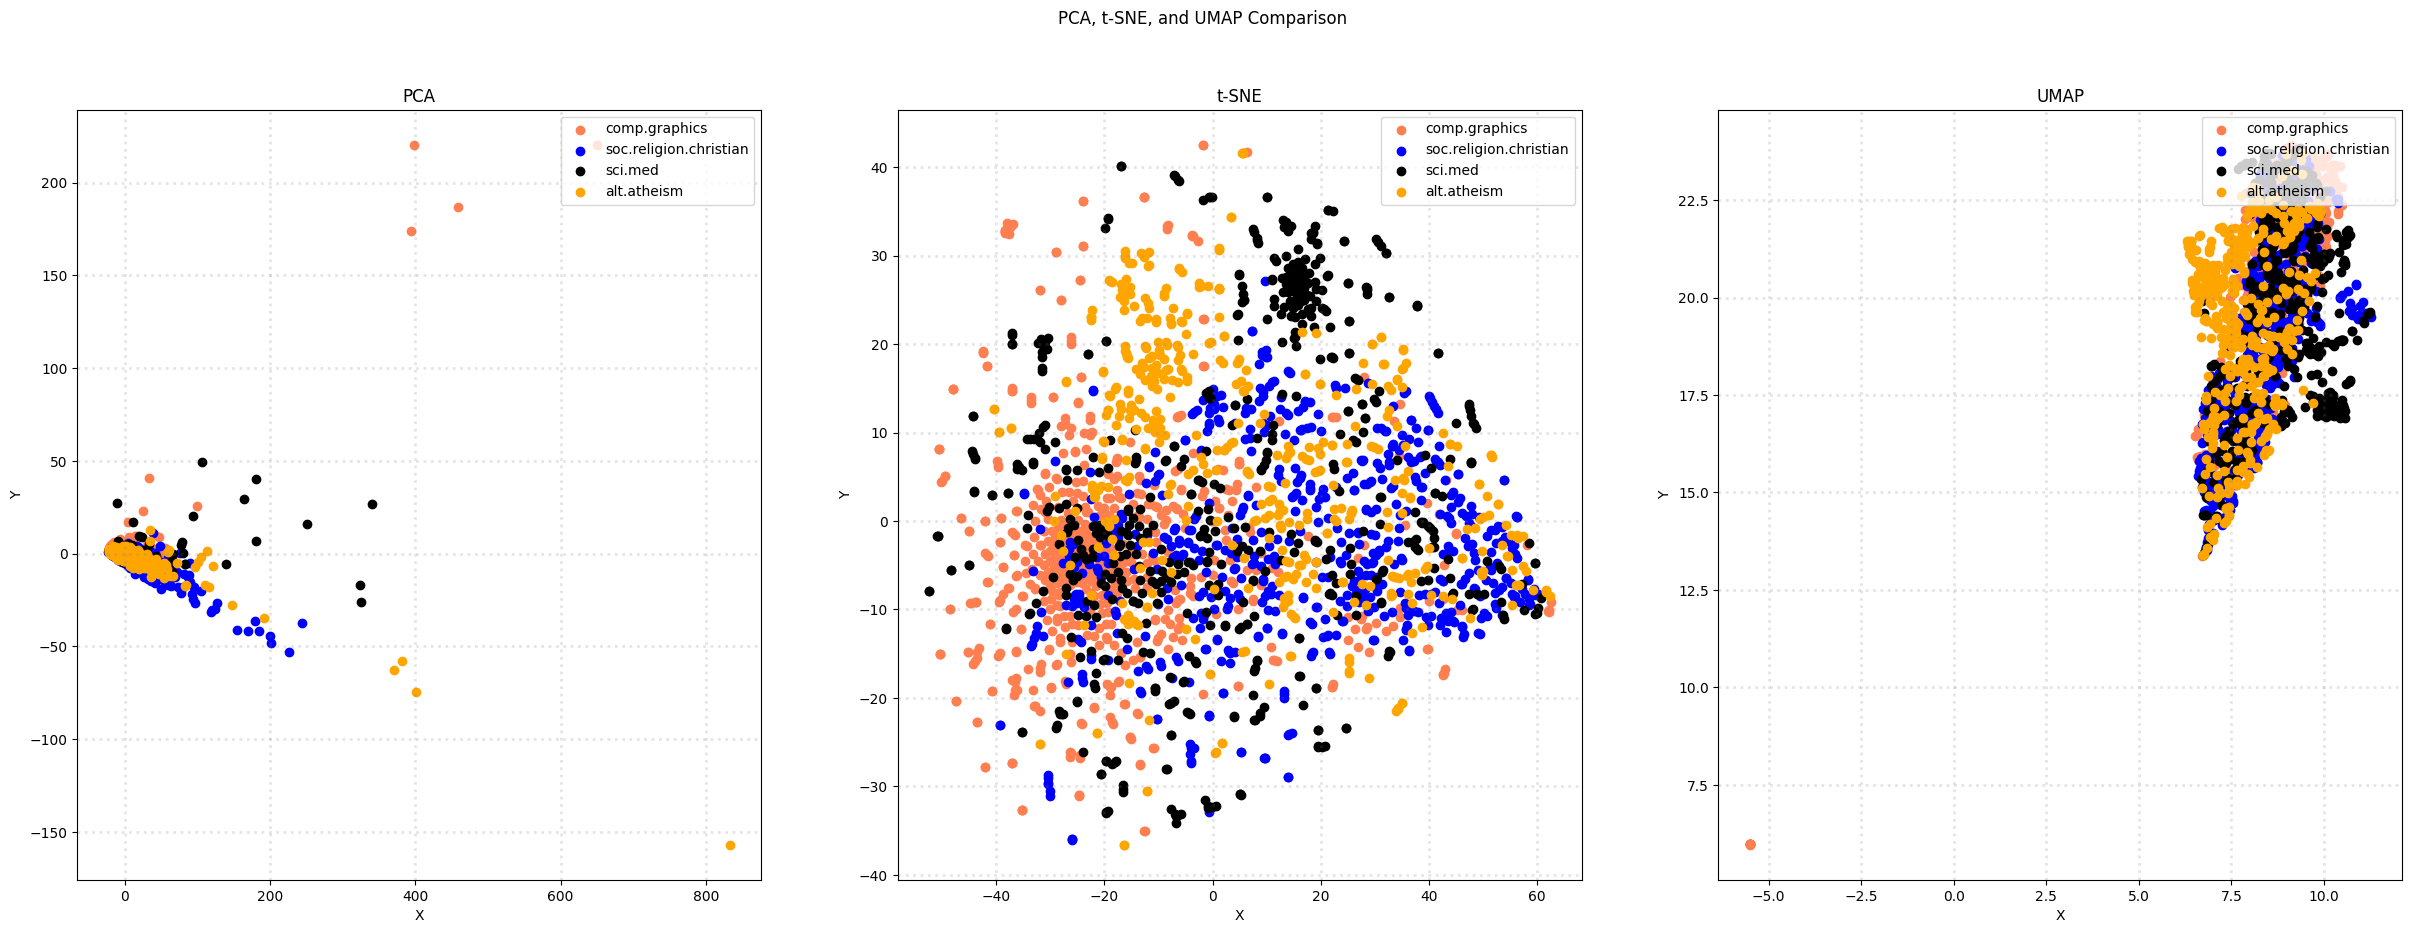

In [140]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

We can see that our PCA visualization hasn't changed much from the previous version. This is likely because the original document-term matrix still dominates what the algorithm captures, overshadowing the new binary pattern data we added.

我們可以看到我們的 PCA 視覺化與先前的版本相比沒有太大變化。這可能是因為原始文檔術語矩陣仍然主導著演算法捕獲的內容，掩蓋了我們添加的新二進位模式資料。

Looking at the t-SNE graph, it might seem different at first glance. However, upon closer inspection, it's almost the same but mirrored along the y-axis, with only slight changes in how the data points are placed. This similarity might be due to the stability of the t-SNE algorithm. Even small changes in the data can result in embeddings that look different but are structurally similar, indicating that the binary patterns may not have significantly altered the relationships among the data points in high-dimensional space.

看看 t-SNE 圖，乍看之下可能有些不同。然而，經過仔細檢查，它幾乎相同，但沿著 y 軸鏡像，數據點的放置方式僅略有變化。這種相似性可能是由於 t-SNE 演算法的穩定性所致。即使資料中的微小變化也可能導致嵌入看起來不同但結構相似，這表明二元模式可能不會顯著改變高維空間中資料點之間的關係。

The UMAP visualization shows the most noticeable changes—it appears more compact. This compactness could be because UMAP uses a more complex distance metric, which might be making it easier to see differences between closer and further points. The binary patterns could also be helping to reduce noise within categories, resulting in clearer, more coherent groups. However, the categories still appear quite mixed together.

UMAP 視覺化顯示了最明顯的變化——它看起來更加緊湊。這種緊湊性可能是因為 UMAP 使用更複雜的距離測量，這可能使得更容易看到較近點和較遠點之間的差異。二元模式還可以幫助減少類別內的噪音，從而產生更清晰、更連貫的組別。然而，這些類別仍然顯得相當混雜。

Remember, just because you can't see clear groups in these visualizations doesn’t mean that a machine learning model won’t be able to classify the data correctly. These techniques are mainly used to help us see and understand complex data in a simpler two or three-dimensional space. However, they have their limits and might not show everything a computer model can find in the data. So, while these tools are great for getting a first look at your data, always use more methods and analyses to get the full picture.

請記住，僅僅因為您在這些視覺化中看不到清晰的群組並不意味著機器學習模型無法正確對資料進行分類。這些技術主要用於幫助我們在更簡單的二維或三維空間中查看和理解複雜的資料。然而，它們有其局限性，可能無法顯示計算機模型可以在數據中找到的所有內容。因此，雖然這些工具非常適合初步了解您的數據，但請始終使用更多方法和分析來全面了解情況。

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

請嘗試將維度減少到 3，並使用 3 維圖繪製結果。使用至少 3 個不同的角度（相機位置）來檢查結果並描述您的發現。

$Hint$: you can refer to Axes3D in the documentation.

$Hint$：可以參考Axes3D的文件。

In [141]:
# Answer here


---

### 5.6 Discretization and Binarization 離散化與二值化
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

在本節中，我們將討論一種非常重要的預處理技術，用於將資料（特別是分類值）轉換為滿足特定演算法所需的某些標準的格式。給定我們目前的原始資料集，我們希望將屬性之一 `category_name` 轉換為四個二進位屬性。換句話說，我們採用類別名稱並將其替換為 `n` 個不對稱二進位屬性。推薦的資料探勘教科書詳細討論了這種轉換背後的邏輯（請參閱第 58 頁）。機器學習社群的人們也將這種轉換稱為 one-hot 編碼，但正如您在課程後面可能會意識到的那樣，這些概念都是相同的，只是我們對如何引用這些概念有不同的偏好。讓我們看看我們想要在程式碼中實現什麼。

In [142]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [143]:
mlb = preprocessing.LabelBinarizer()

In [144]:
mlb.fit(X.category)

LabelBinarizer()

In [145]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [146]:
X[0:9]

,text,category,category_name,unigrams,tokenized_text,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","{Converting, Subject:, The, files, to, (Michae...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","{Deglurkar), this., Subject:, The, ani@ms.uky....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","{don't, >number, lunch, Diego, more, supportiv...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","{s0612596@let.rug.nl, anyone, me, english,, at...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","{""clothes, Jesus, invite, Subject:, The, decis...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","{doctor's, arrogance., well., doctor, |, Subje...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","{discourse, >appropriate, don't, giving, Subje...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","{vitamin, don't, ones., cause, gets, Teenage, ...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","{|, Werner), Explain., Subject:, >This, two, s...","[0, 0, 1, 0]"


Take a look at the new attribute we have added to the `X` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

看一下我們新增到 `X` 表中的新屬性。您可以看到名為 `bin_category` 的新屬性包含一個由 0 和 1 組成的陣列。 `1`基本上表示我們二值化的標籤或類別的位置。如果查看前兩筆記錄，則一條位於陣列的槽 2 中；另一筆位於陣列中的槽 2 中。這有助於向我們將此資料提供給的任何演算法表明該記錄屬於該特定類別。

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

具有**連續值**的屬性也有轉換資料的策略；這通常稱為**離散化**（請參閱教科書以獲取更多資訊）。

---

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

嘗試使用 `category_name` 列產生二值化。有效嗎？

In [147]:
# Answer here


---

# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [148]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [149]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [150]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [151]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 2 and 3: 0.565566
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_20364\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_20364\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_20364\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_20364\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0. 

We can assume that we have the more common features in the documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3. 


---

# 7. Data Classification
Data classification is one of the most critical steps in the final stages of the data mining process. After uncovering patterns, trends, or insights from raw data, classification helps organize and label the data into predefined categories. This step is crucial in making the mined data actionable, as it allows for accurate predictions and decision-making. For example, in text mining, classification can be used to categorize documents based on their content, like classifying news articles into categories such as sports, politics, or technology.
Among various classification techniques, the **Naive Bayes classifier** is a simple yet powerful algorithm commonly used for text classification tasks. Specifically, the Multinomial Naive Bayes classifier is particularly suited for datasets where features are represented by term frequencies, such as a document-term matrix, like the one we have.

- **Multinomial Naive Bayes:**
    The Multinomial Naive Bayes classifier works by assuming that the features (words or terms in text data) follow a multinomial distribution. In simple terms, it calculates the probability of a document belonging to a particular category based on the frequency of words in that document, assuming independence between words (the "naive" part of Naive Bayes). Despite this assumption, it often performs remarkably well for text data, especially when working with word count features. Now, when incorporating the binary matrix of patterns we have, it remains compatible because the binary values can be seen as a count of pattern occurrences (1 for present, 0 for absent). Although binary features are not true "counts," the Multinomial Naive Bayes classifier can still handle them without issue. For more information you can go to: [NB Classifier](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/)
    
We will implement a Multinomial Naive Bayes, for that we first choose how to split our data, in this case we will follow a typical **70/30 split for the training and test set**. Let's see a comparison of what we obtain when classifying our data without patterns vs our data with the patterns.

In [152]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [153]:
X_train

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
X_test

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,zvi,zvonko,zwart,zyeh,zyklon,zyxel,zz,zzz,ªl,íålittin
561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1513,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9660766961651918

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.9535    0.9535    0.9535       129
         comp.graphics     0.9540    0.9822    0.9679       169
               sci.med     0.9839    0.9683    0.9760       189
soc.religion.christian     0.9683    0.9581    0.9632       191

              accuracy                         0.9661       678
             macro avg     0.9649    0.9655    0.9651       678
          weighted avg     0.9663    0.9661    0.9661       678



In [156]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [157]:
X_train

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,192 means,quackery,newsreader pl8 tin,pl8 tin,pl8 newsreader,holland,deeply,unlikely,transplant,recurrent
634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
X_test

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,192 means,quackery,newsreader pl8 tin,pl8 tin,pl8 newsreader,holland,deeply,unlikely,transplant,recurrent
561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1513,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9734513274336283

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism     0.9837    0.9380    0.9603       129
         comp.graphics     0.9940    0.9822    0.9881       169
               sci.med     0.9789    0.9841    0.9815       189
soc.religion.christian     0.9444    0.9791    0.9614       191

              accuracy                         0.9735       678
             macro avg     0.9753    0.9709    0.9728       678
          weighted avg     0.9739    0.9735    0.9735       678



As you might have seen from the first model, the document-term matrix data already allows the model to classify it with great accuracy, but if we add the additional information provided by the patterns then we see a slightly better result to an already high score. While the document-term matrix captures individual word frequencies, the pattern matrix adds valuable information about co-occurrences and higher-level word combinations, providing complementary insights. This enhanced feature set allows the classifier to better differentiate between categories, particularly in cases where word frequencies alone might not be enough. 

So, now you know the importance of feature creation and pattern mining, it can give you an edge at the time of data classification.

-----

## 8. Concluding Remarks

Wow! We have come a long way! We can now call ourselves experts of Data Preprocessing. You should feel excited and proud because the process of Data Mining usually involves 70% preprocessing and 30% training learning models. You will learn this as you progress in the Data Mining course. I really feel that if you go through the exercises and challenge yourself, you are on your way to becoming a super Data Scientist. 

From here the possibilities for you are endless. You now know how to use almost every common technique for preprocessing with state-of-the-art tools, such as Pandas, Scikit-learn, UMAP and PAMI. You are now with the trend! 

After completing this notebook you can do a lot with the results we have generated. You can train algorithms and models that are able to classify articles into certain categories and much more. You can also try to experiment with different datasets, or venture further into text analytics by using new deep learning techniques such as word2vec. All of this will be presented in the next lab session. Until then, go teach machines how to be intelligent to make the world a better place. 

----

## 9. References

- Pandas cook book ([Recommended for starters](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html))
- [Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Introduction to Data Mining, Addison Wesley](https://dl.acm.org/citation.cfm?id=1095618)